In [ ]:
pip install fastf1

#FP1

In [ ]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

session = fastf1.get_session(2023, 'Las Vegas','FP1')
session.load()

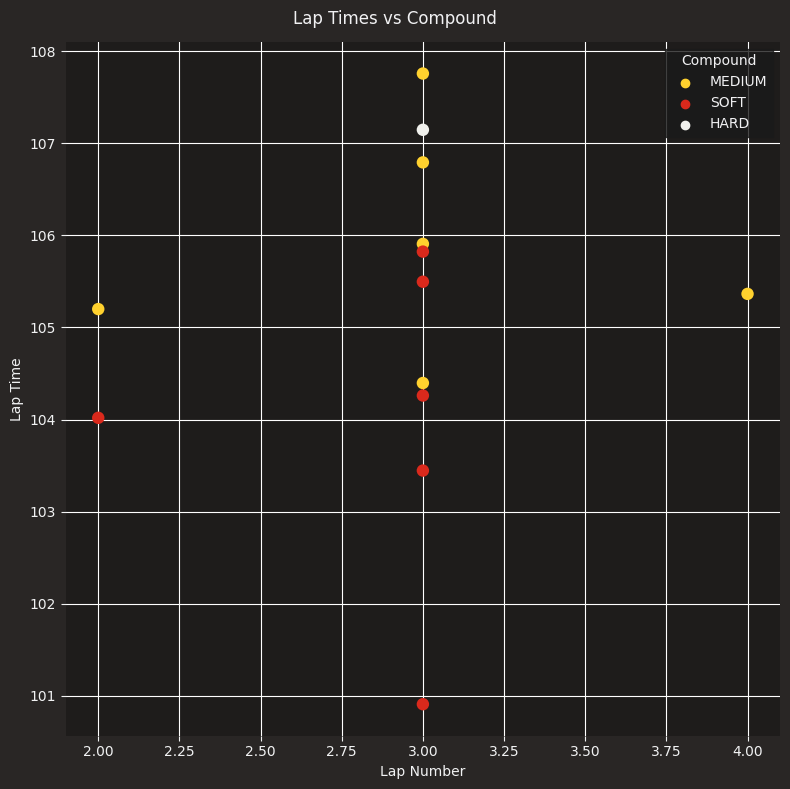

In [ ]:
driver_laps = session.laps.pick_quicklaps().reset_index()

# Convert 'LapTime' to numeric (seconds) for plotting
driver_laps['LapTime'] = driver_laps['LapTime'].dt.total_seconds()

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
#ax.invert_yaxis()
plt.suptitle("Lap Times vs Compound")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Index(['Haas F1 Team', 'Ferrari', 'Red Bull Racing', 'Mercedes', 'AlphaTauri',
       'Alpine', 'Alfa Romeo'],
      dtype='object', name='Team')


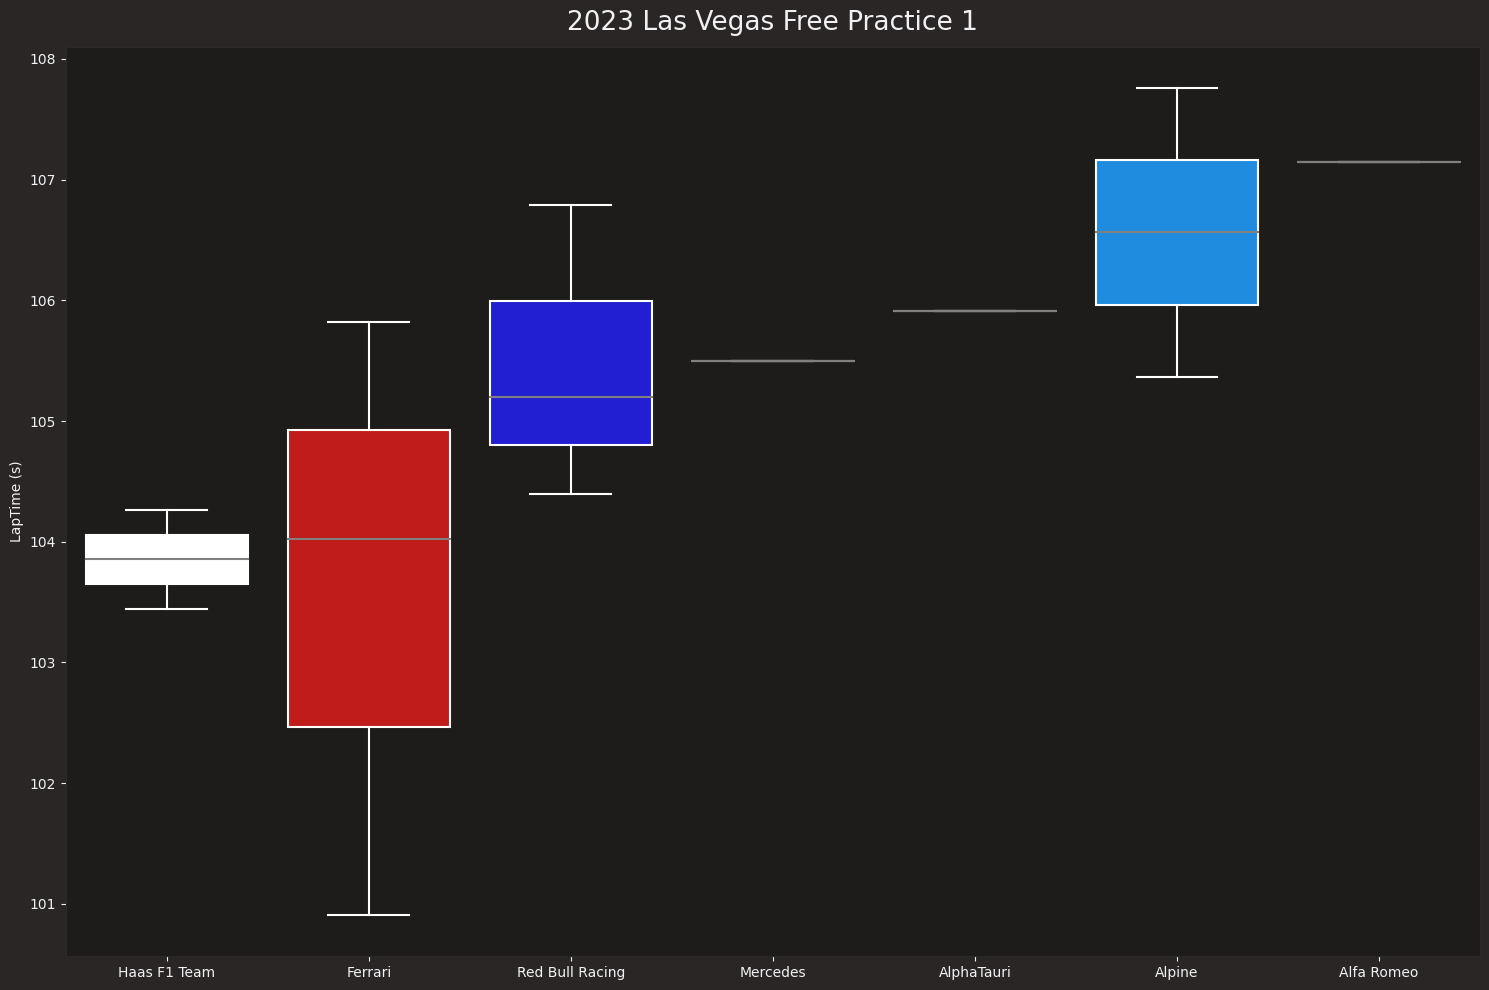

In [ ]:
laps = session.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 Las Vegas Free Practice 1")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

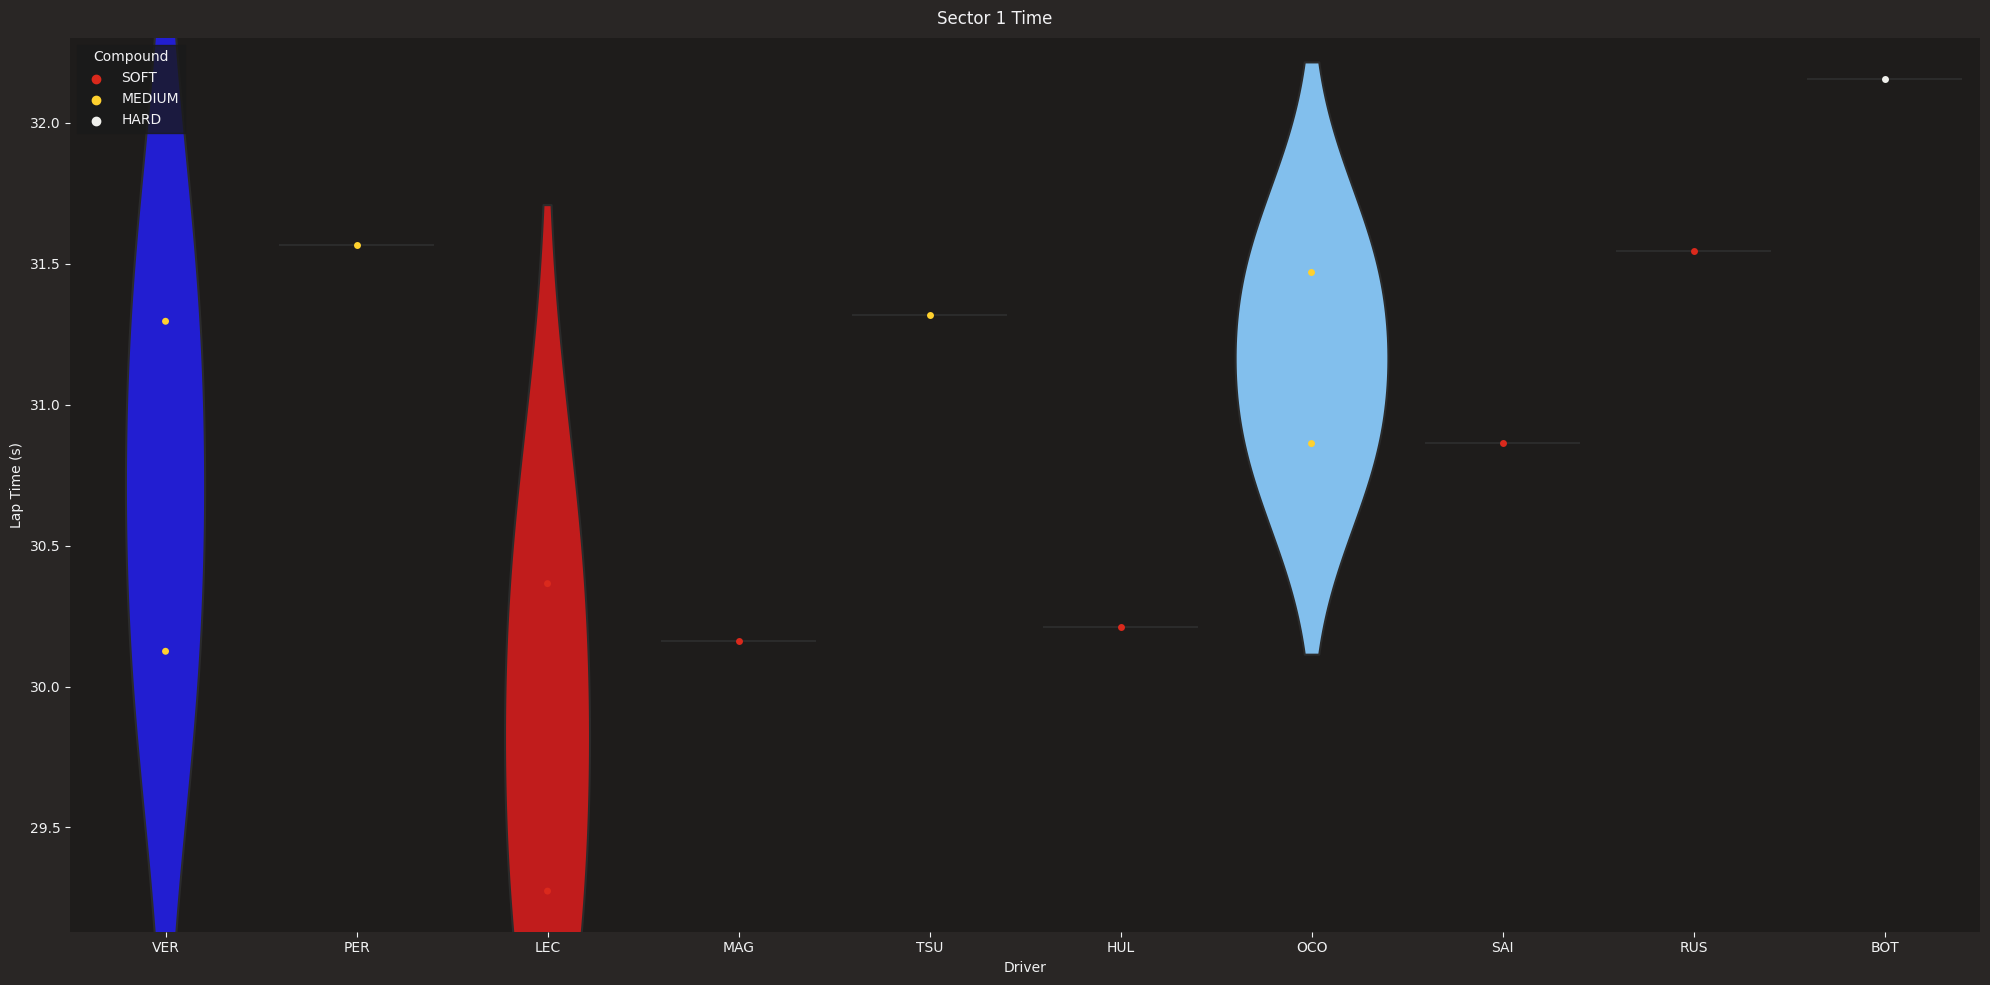

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector1Time"] = driver_laps["Sector1Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector1Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector1Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 1 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


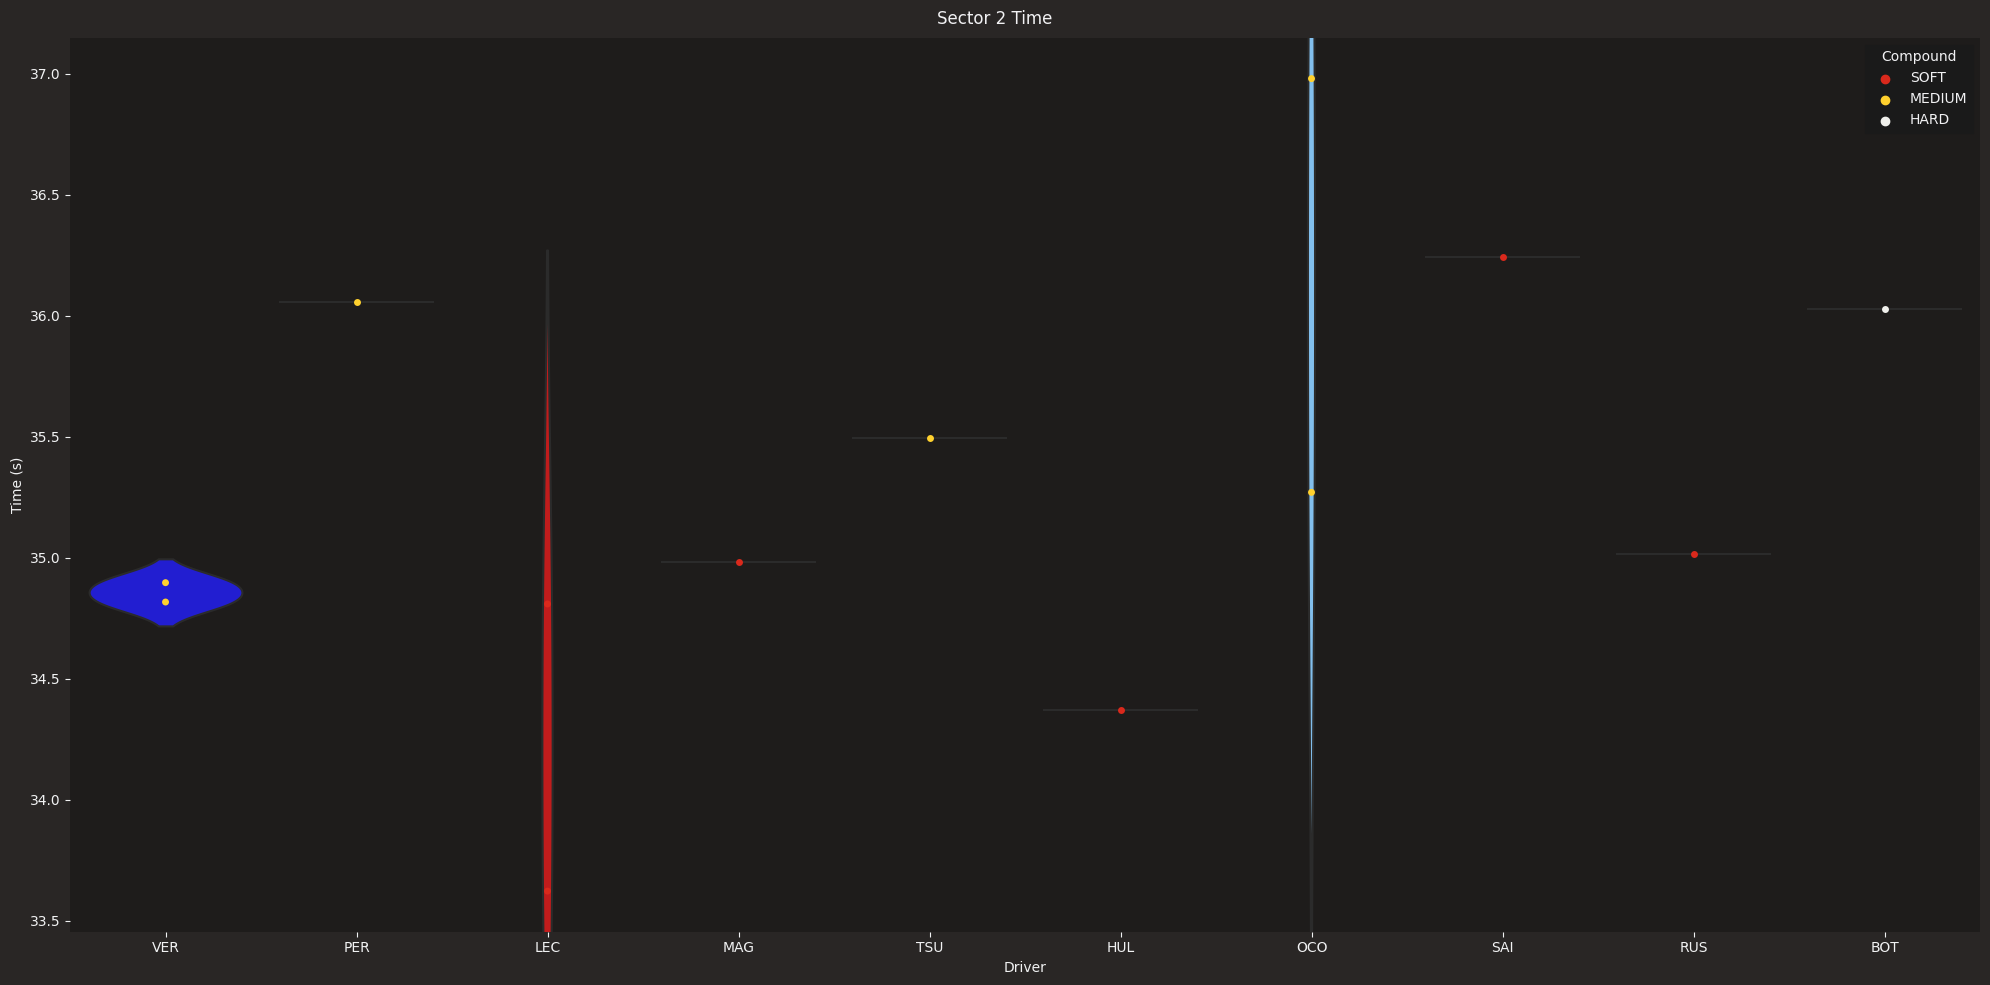

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector2Time"] = driver_laps["Sector2Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector2Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector2Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Time (s)")
plt.suptitle("Sector 2 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()



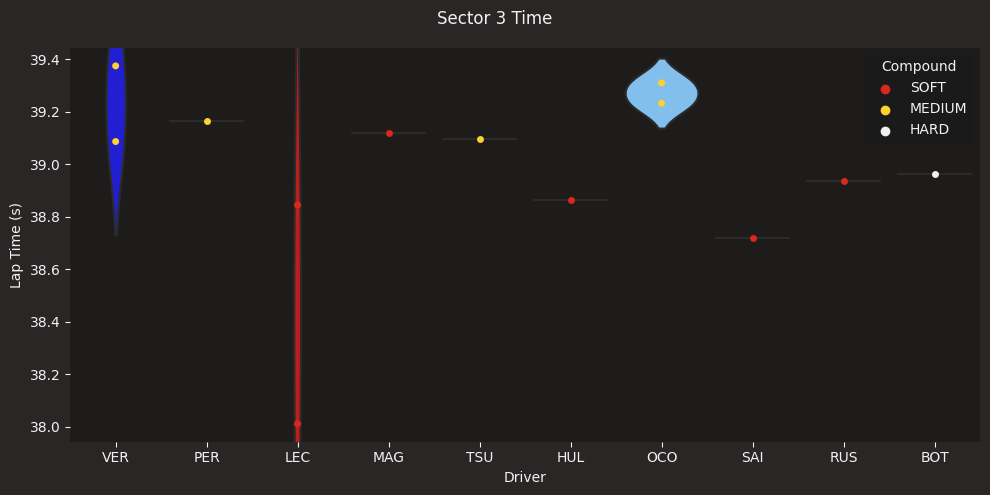

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector3Time"] = driver_laps["Sector3Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector3Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector3Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 3 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


#FP2

In [ ]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

session = fastf1.get_session(2023, 'Las Vegas','FP2')
session.load()

core           INFO 	Loading data for Las Vegas Grand Prix - Practice 2 [v3.1.6]
INFO:fastf1.fastf1.core:Loading data for Las Vegas Grand Prix - Practice 2 [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for 

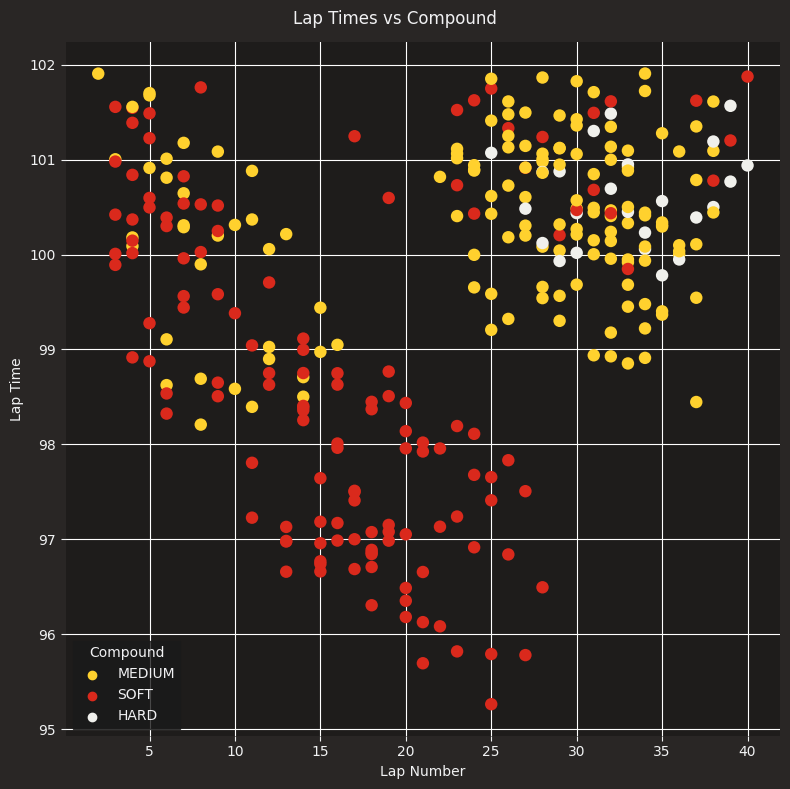

In [ ]:
driver_laps = session.laps.pick_quicklaps().reset_index()

# Convert 'LapTime' to numeric (seconds) for plotting
driver_laps['LapTime'] = driver_laps['LapTime'].dt.total_seconds()

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
#ax.invert_yaxis()
plt.suptitle("Lap Times vs Compound")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Index(['Ferrari', 'Red Bull Racing', 'Alfa Romeo', 'AlphaTauri',
       'Aston Martin', 'Mercedes', 'Haas F1 Team', 'Williams', 'Alpine',
       'McLaren'],
      dtype='object', name='Team')


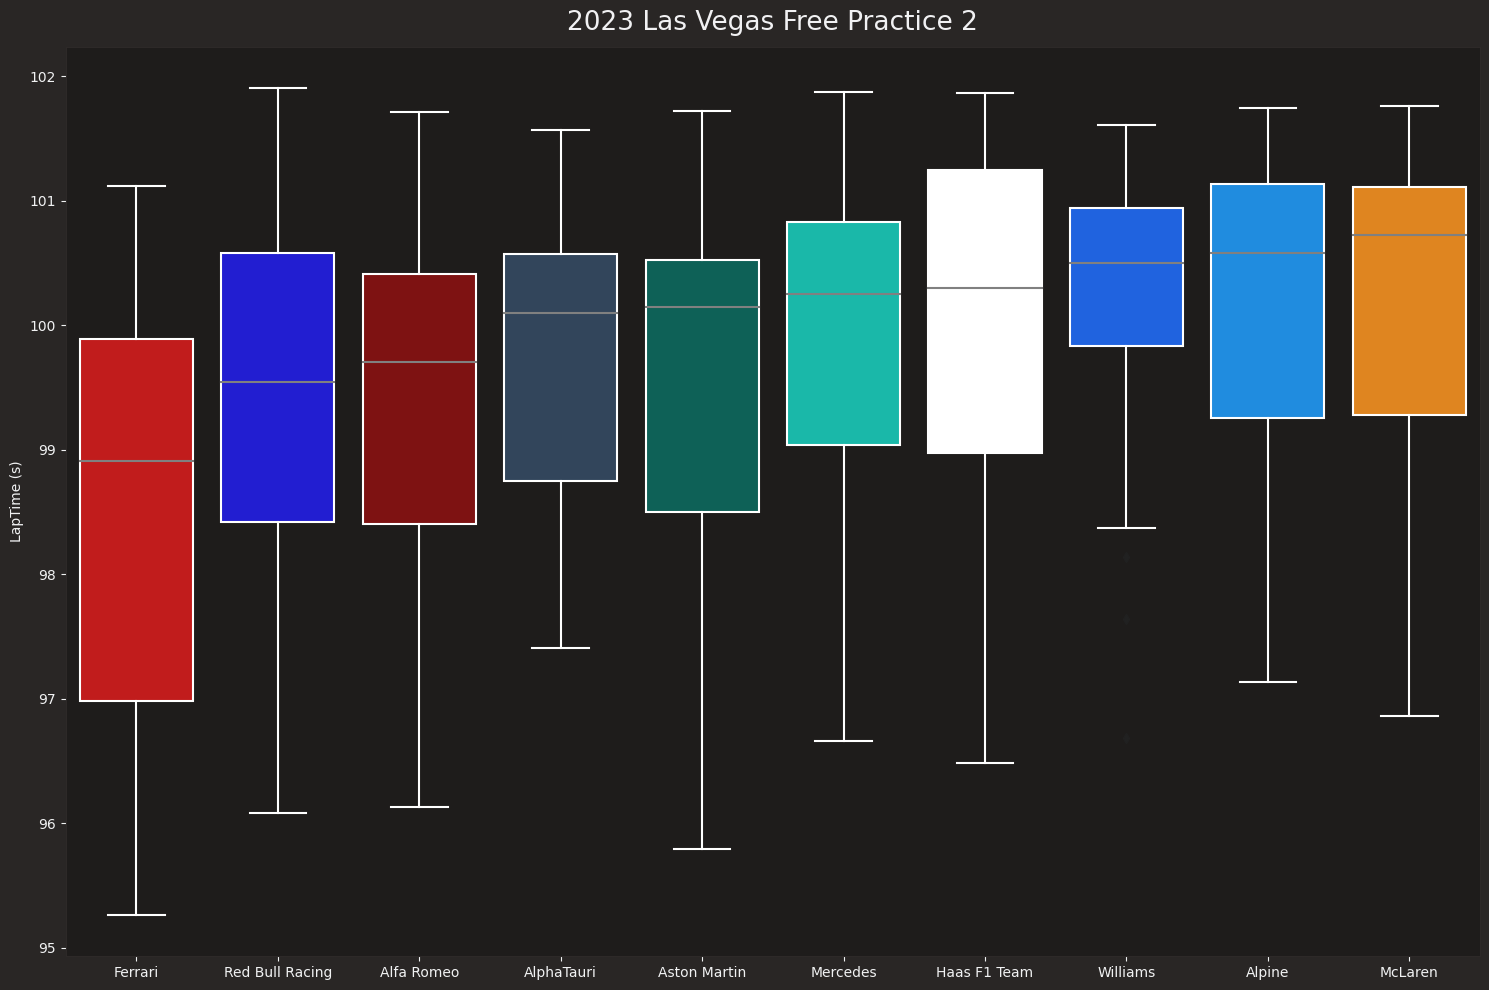

In [ ]:
laps = session.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 Las Vegas Free Practice 2")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

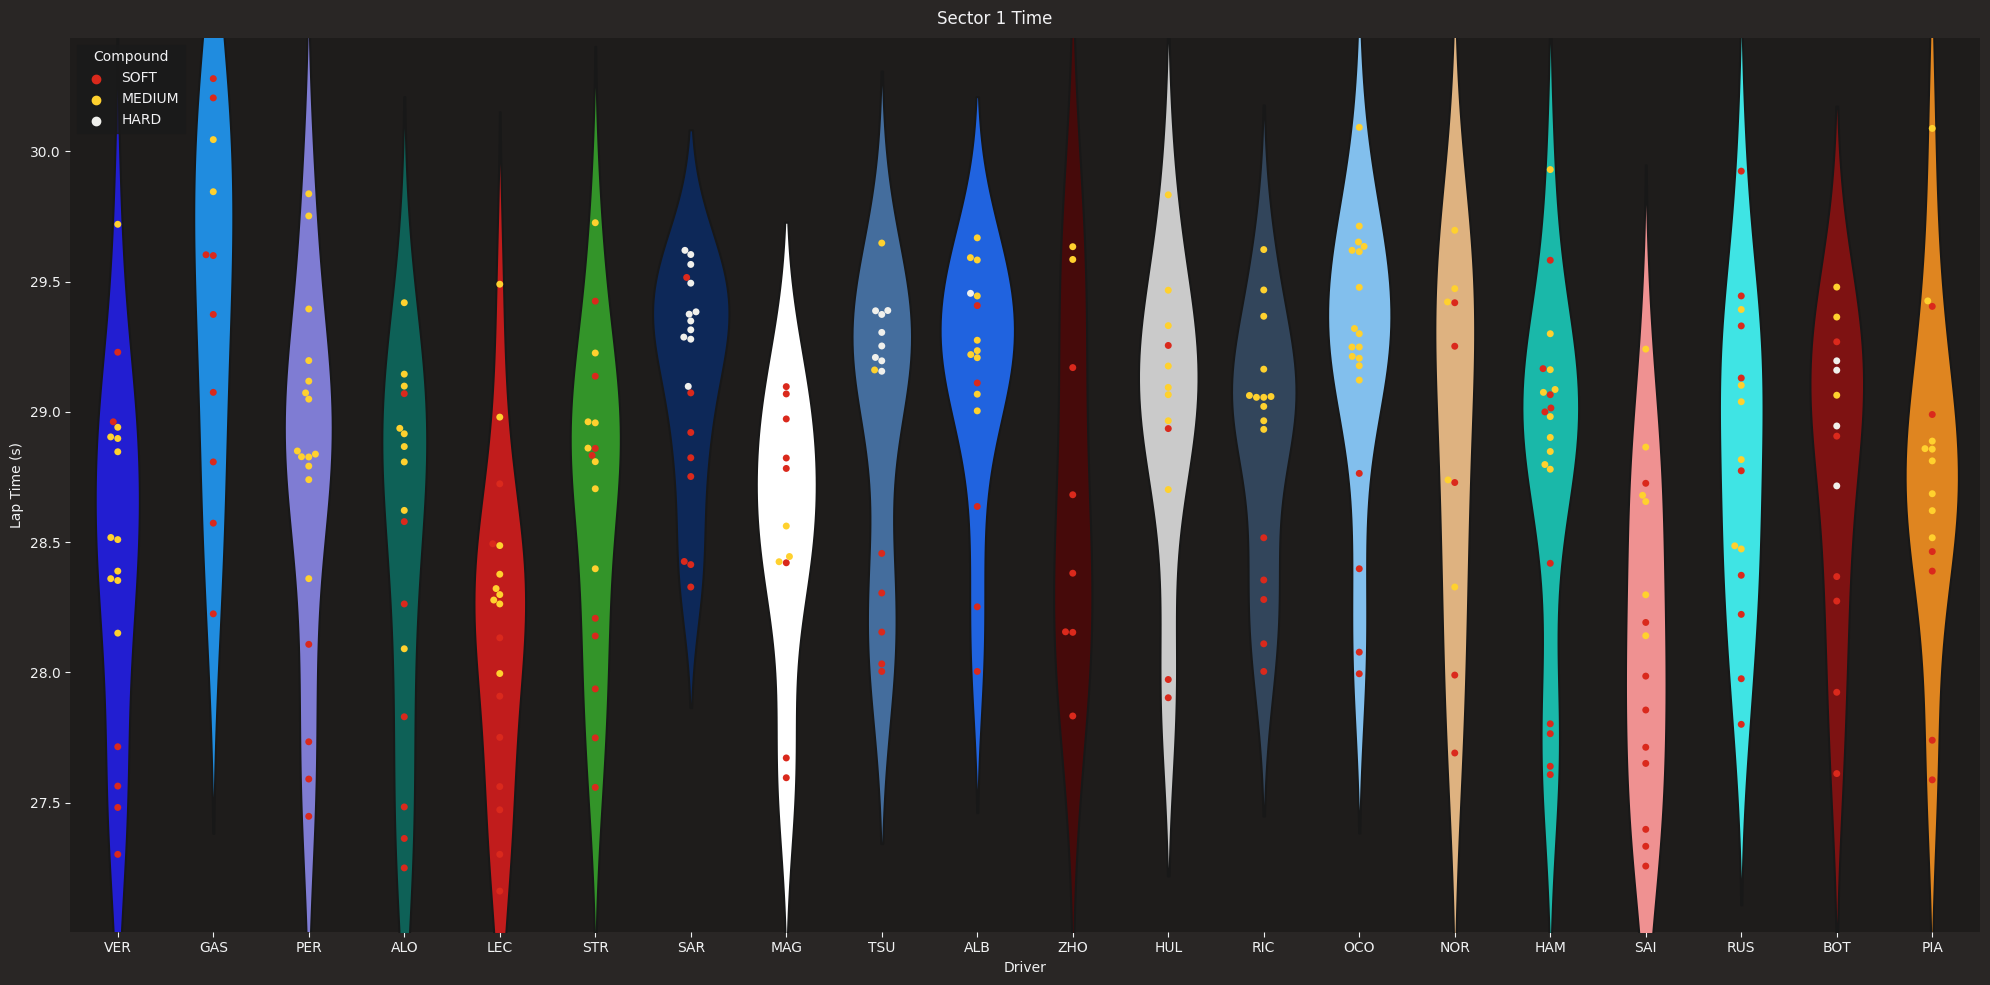

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector1Time"] = driver_laps["Sector1Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector1Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector1Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 1 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


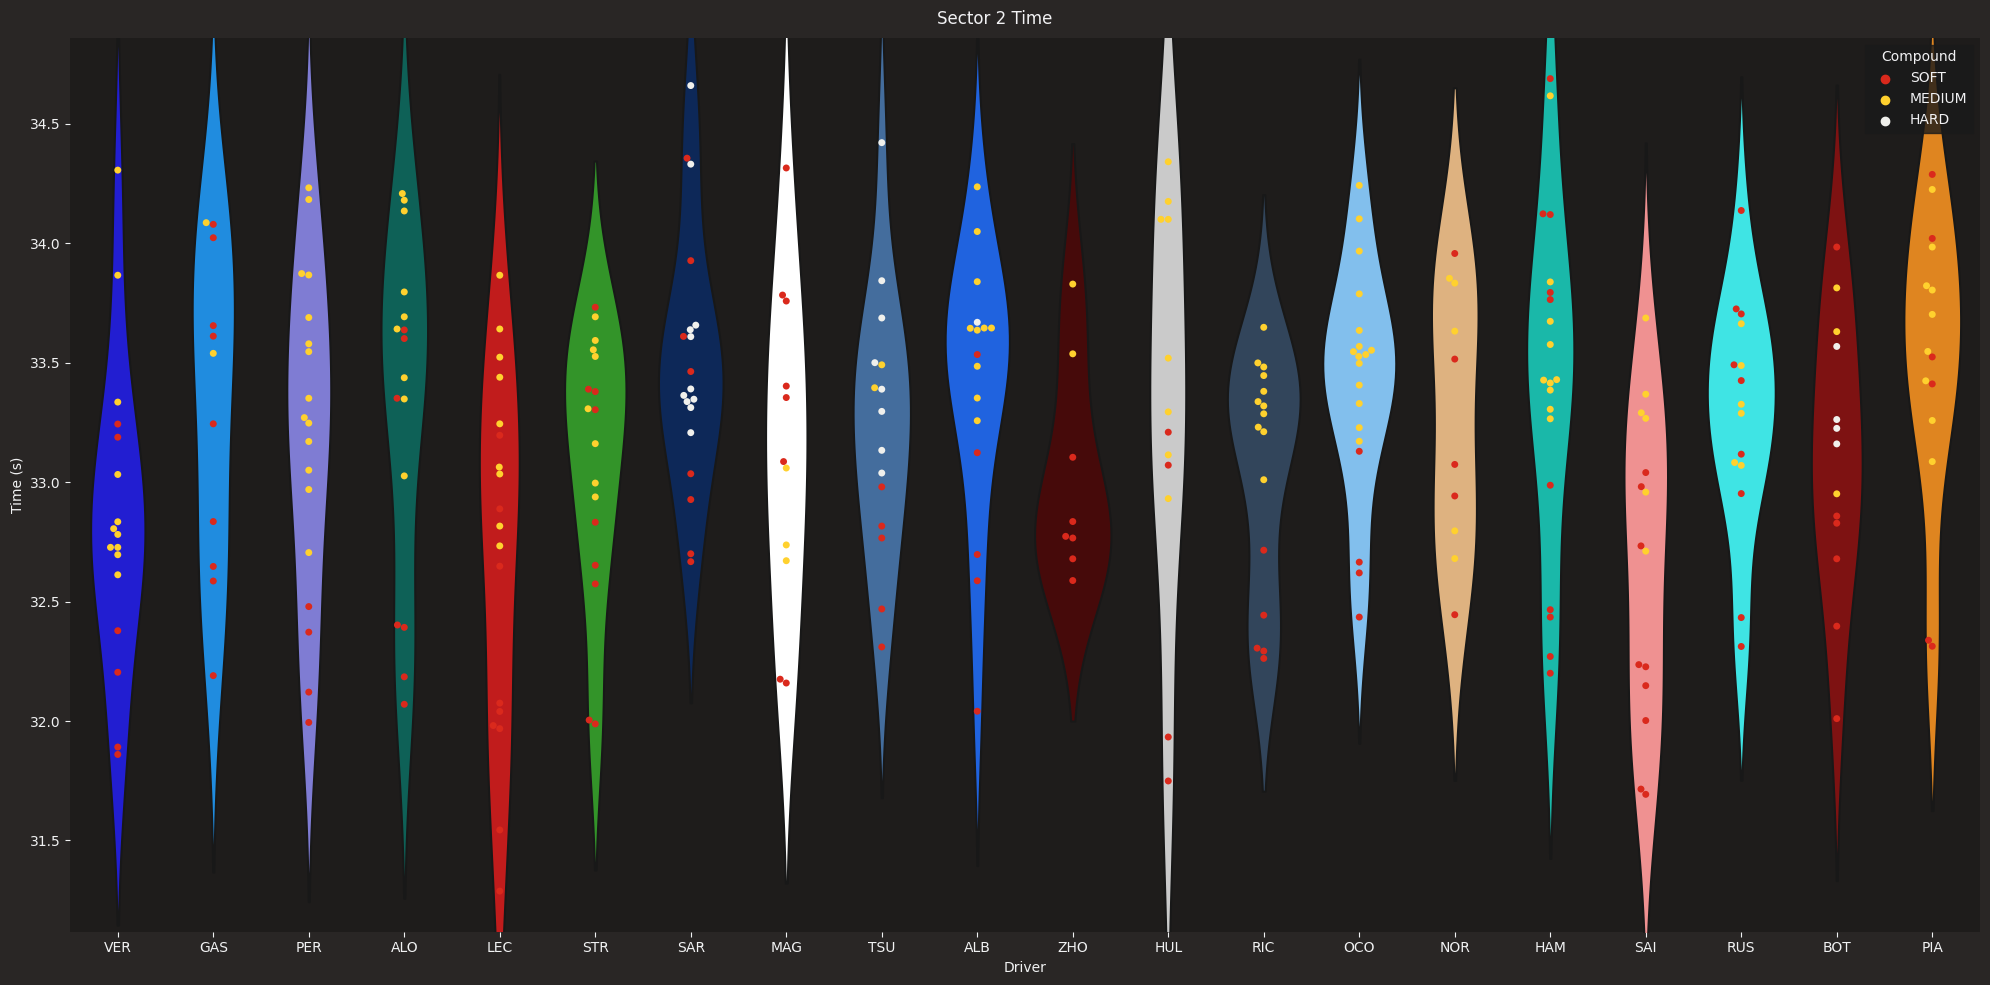

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector2Time"] = driver_laps["Sector2Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector2Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector2Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Time (s)")
plt.suptitle("Sector 2 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


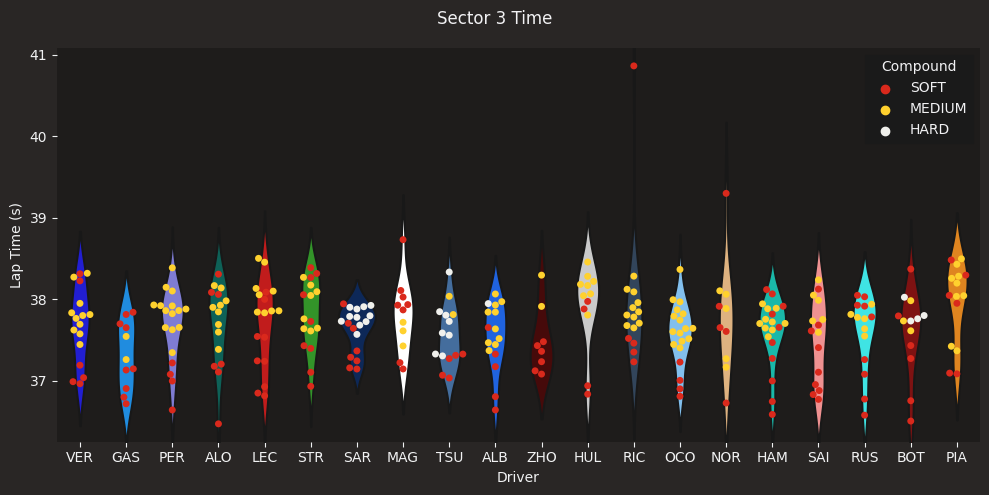

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector3Time"] = driver_laps["Sector3Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector3Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector3Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 3 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


#FP3

In [ ]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

session = fastf1.get_session(2023, 'Las Vegas','FP3')
session.load()

core           INFO 	Loading data for Las Vegas Grand Prix - Practice 3 [v3.1.6]
INFO:fastf1.fastf1.core:Loading data for Las Vegas Grand Prix - Practice 3 [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for 

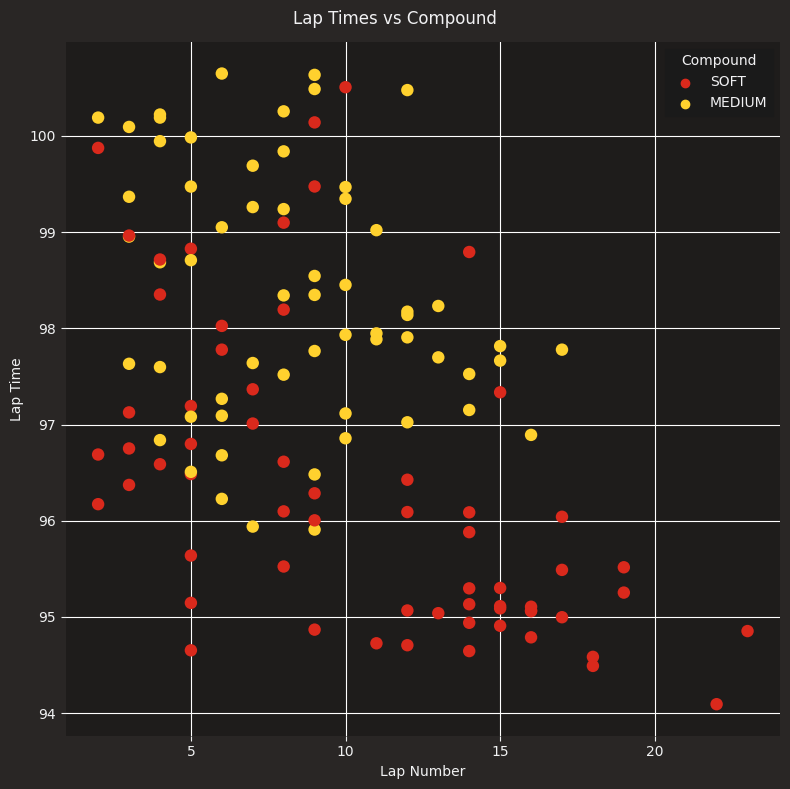

In [ ]:
driver_laps = session.laps.pick_quicklaps().reset_index()

# Convert 'LapTime' to numeric (seconds) for plotting
driver_laps['LapTime'] = driver_laps['LapTime'].dt.total_seconds()

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
#ax.invert_yaxis()
plt.suptitle("Lap Times vs Compound")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Index(['Red Bull Racing', 'Williams', 'Aston Martin', 'Alfa Romeo', 'Alpine',
       'AlphaTauri', 'Haas F1 Team', 'Ferrari', 'McLaren', 'Mercedes'],
      dtype='object', name='Team')


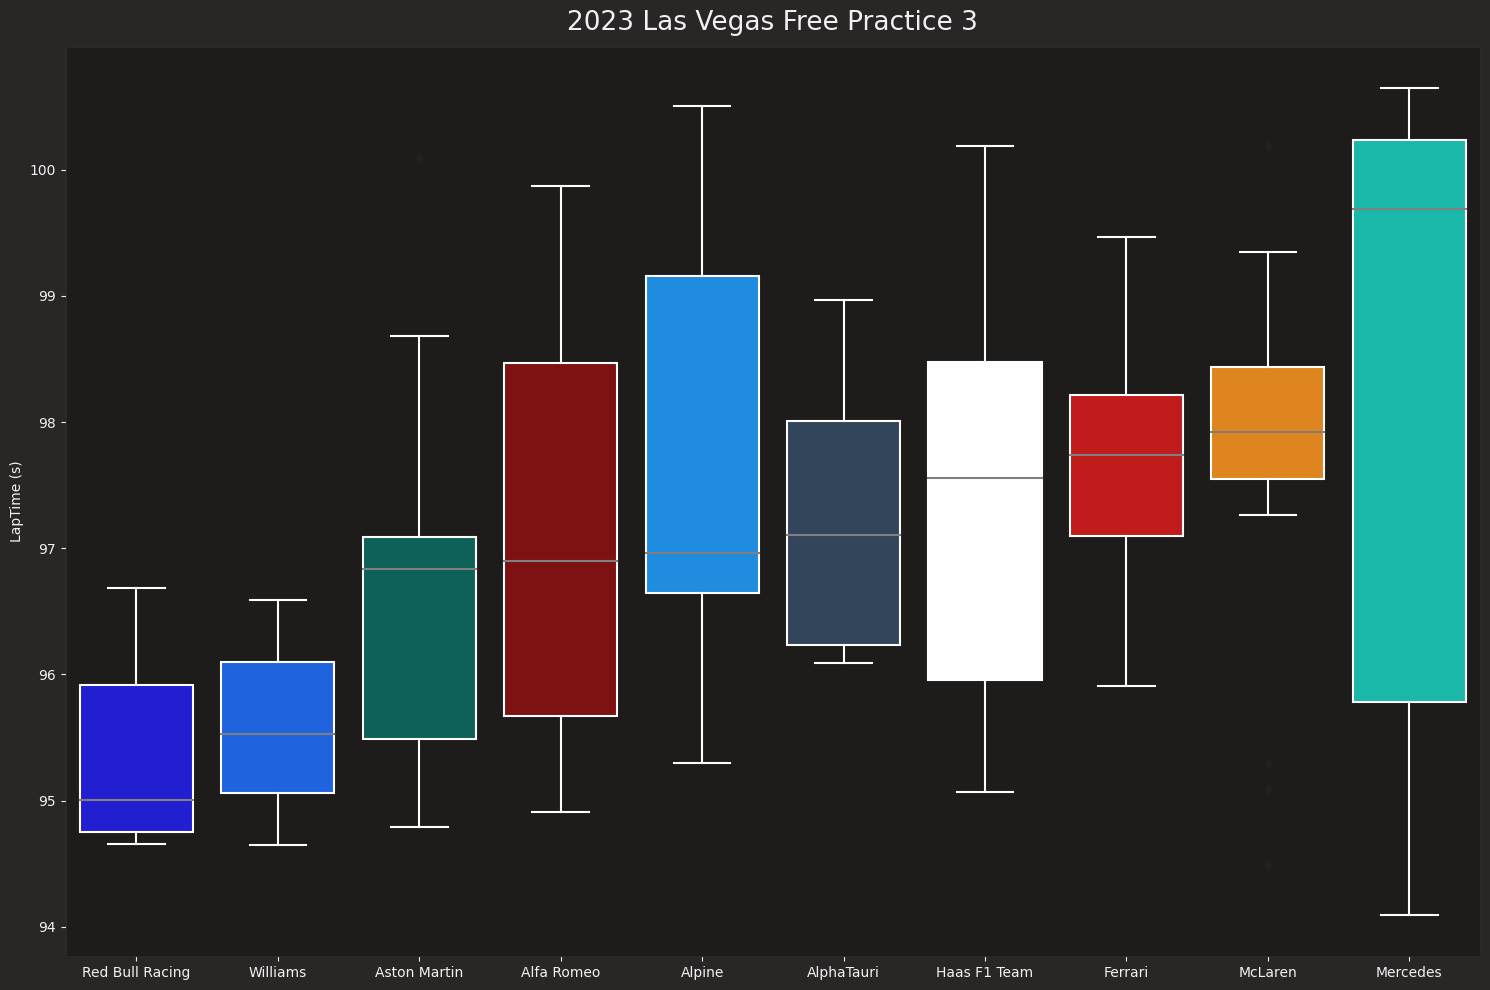

In [ ]:
laps = session.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 Las Vegas Free Practice 3")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

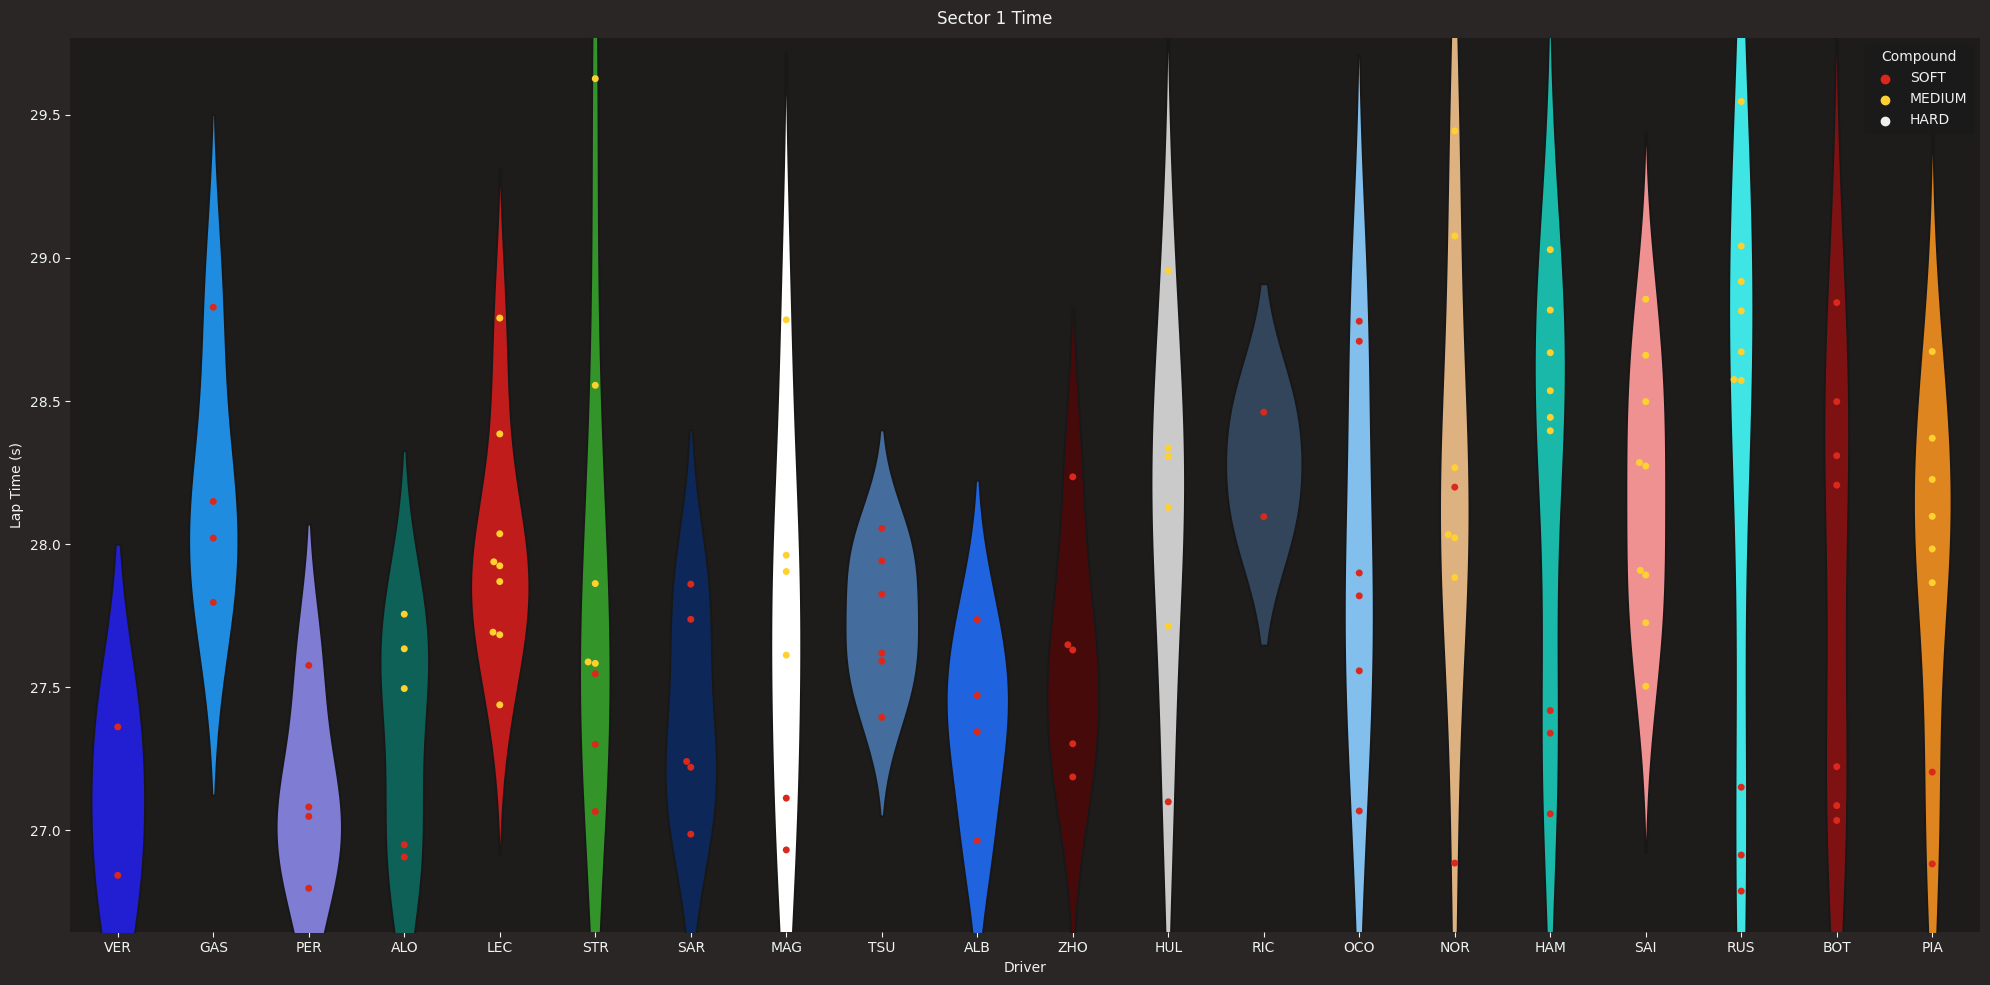

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector1Time"] = driver_laps["Sector1Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector1Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector1Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 1 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


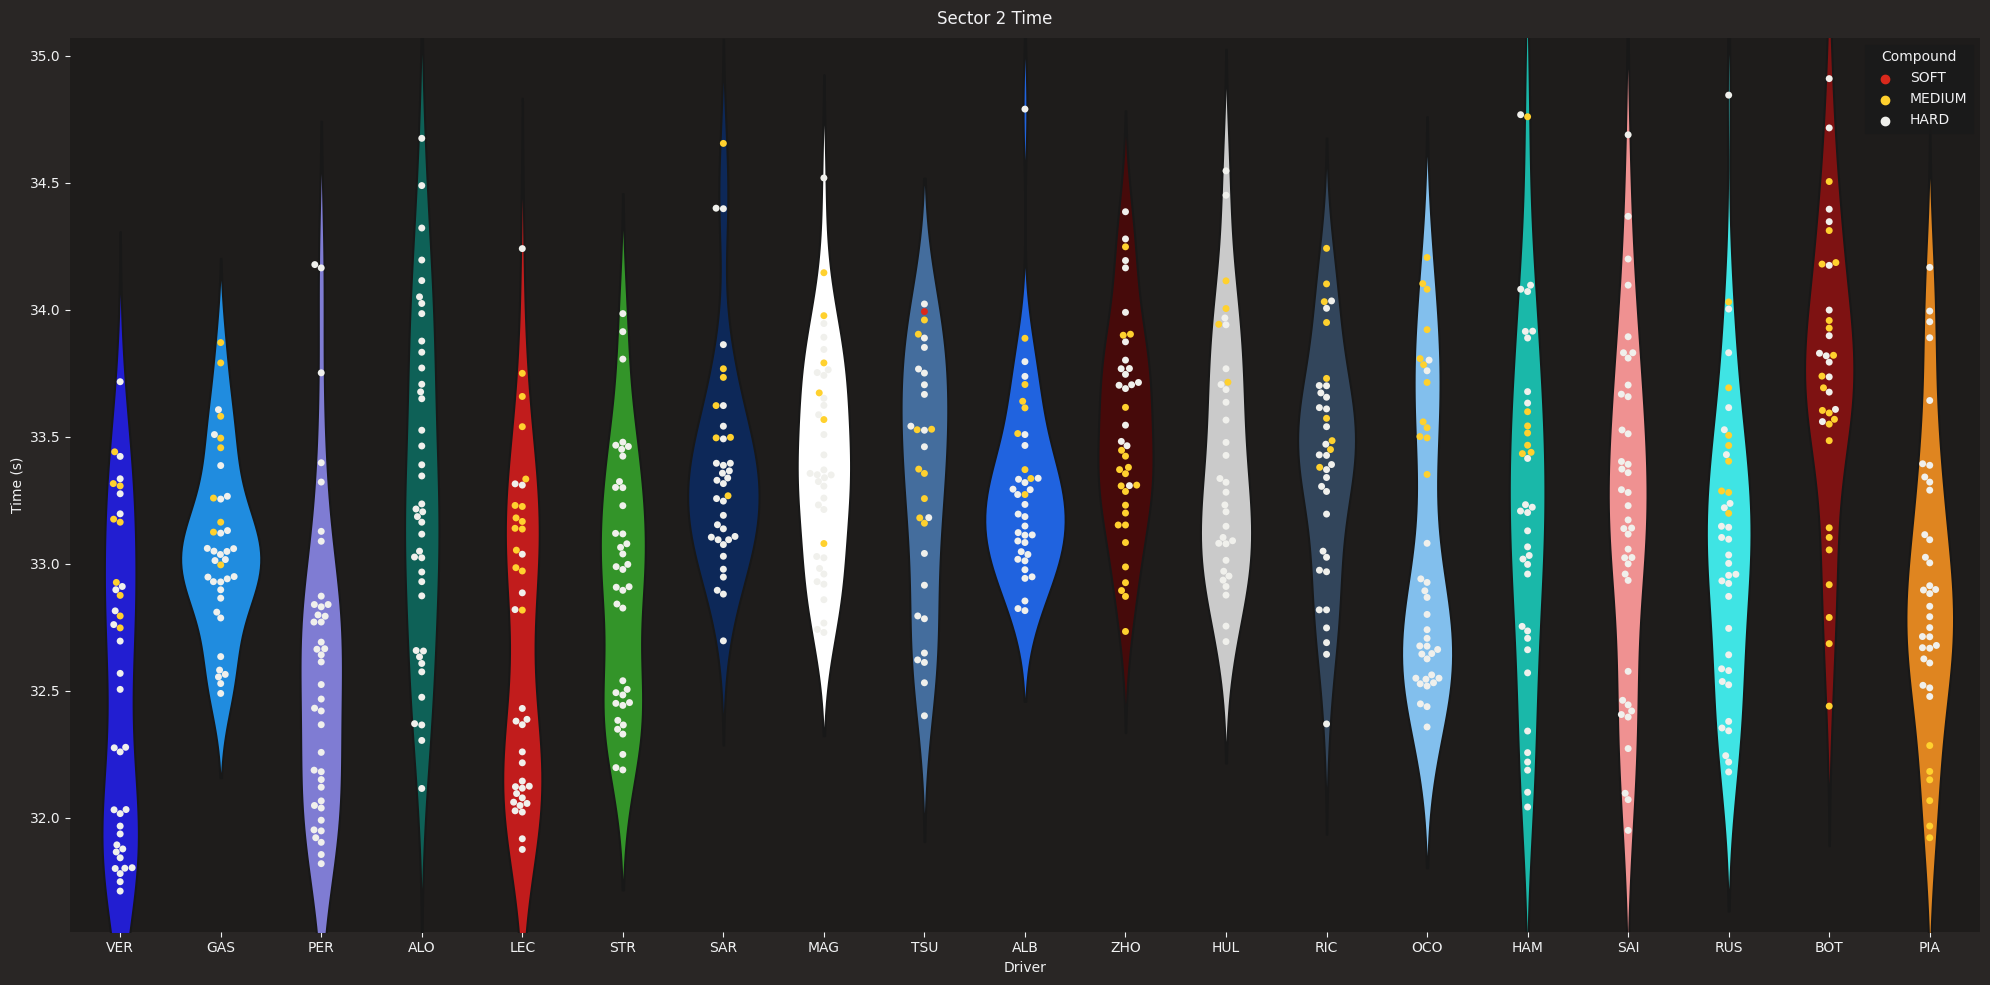

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
#driver_laps["Sector2Time"] = driver_laps["Sector2Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector2Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector2Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Time (s)")
plt.suptitle("Sector 2 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()



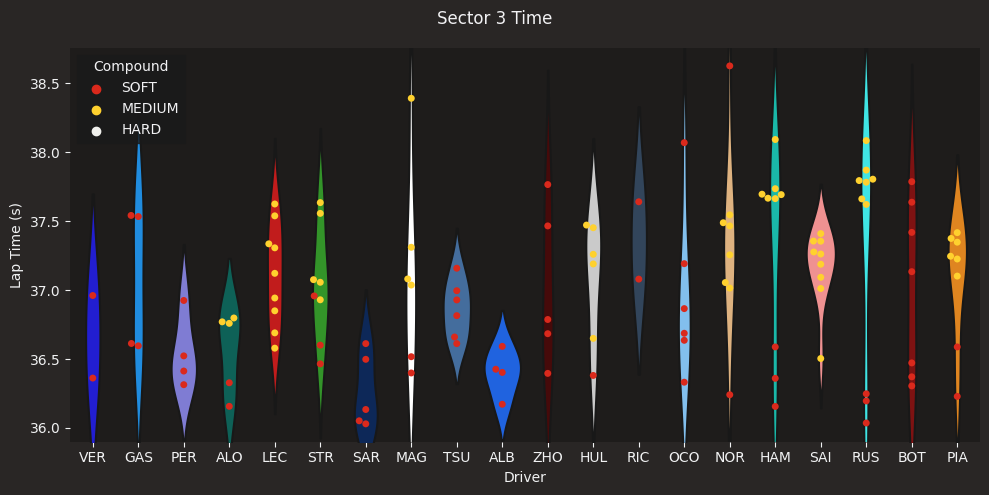

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector3Time"] = driver_laps["Sector3Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector3Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector3Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 3 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


#QUALIFYING

In [ ]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

session = fastf1.get_session(2023, 'Las Vegas','Q')
session.load()

core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.1.6]
INFO:fastf1.fastf1.core:Loading data for Las Vegas Grand Prix - Qualifying [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for 

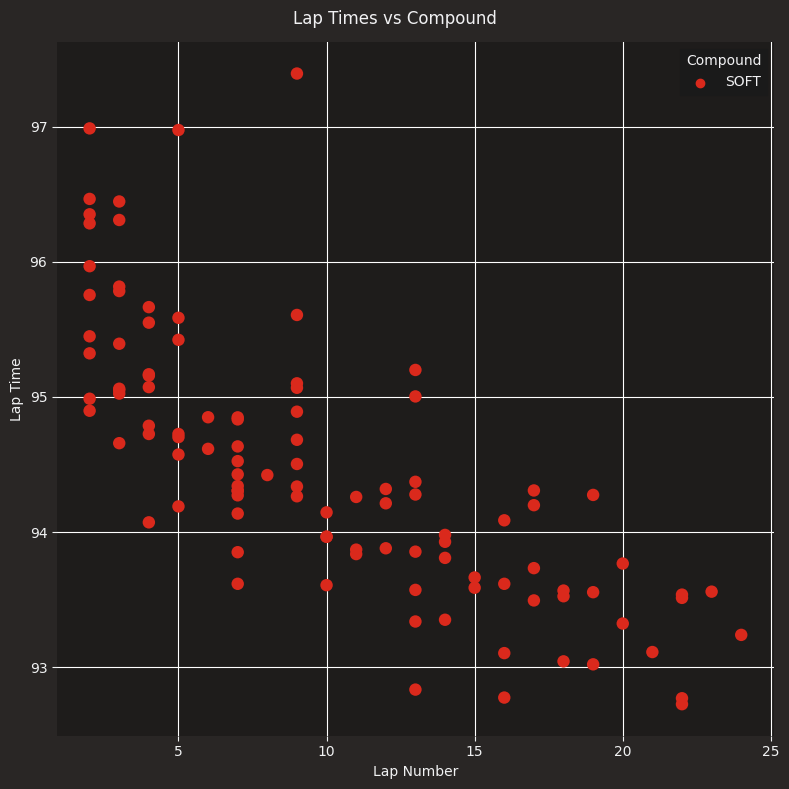

In [ ]:
driver_laps = session.laps.pick_quicklaps().reset_index()

# Convert 'LapTime' to numeric (seconds) for plotting
driver_laps['LapTime'] = driver_laps['LapTime'].dt.total_seconds()

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
#ax.invert_yaxis()
plt.suptitle("Lap Times vs Compound")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Index(['Ferrari', 'Mercedes', 'Red Bull Racing', 'Haas F1 Team', 'Williams',
       'Aston Martin', 'Alpine', 'Alfa Romeo', 'McLaren', 'AlphaTauri'],
      dtype='object', name='Team')


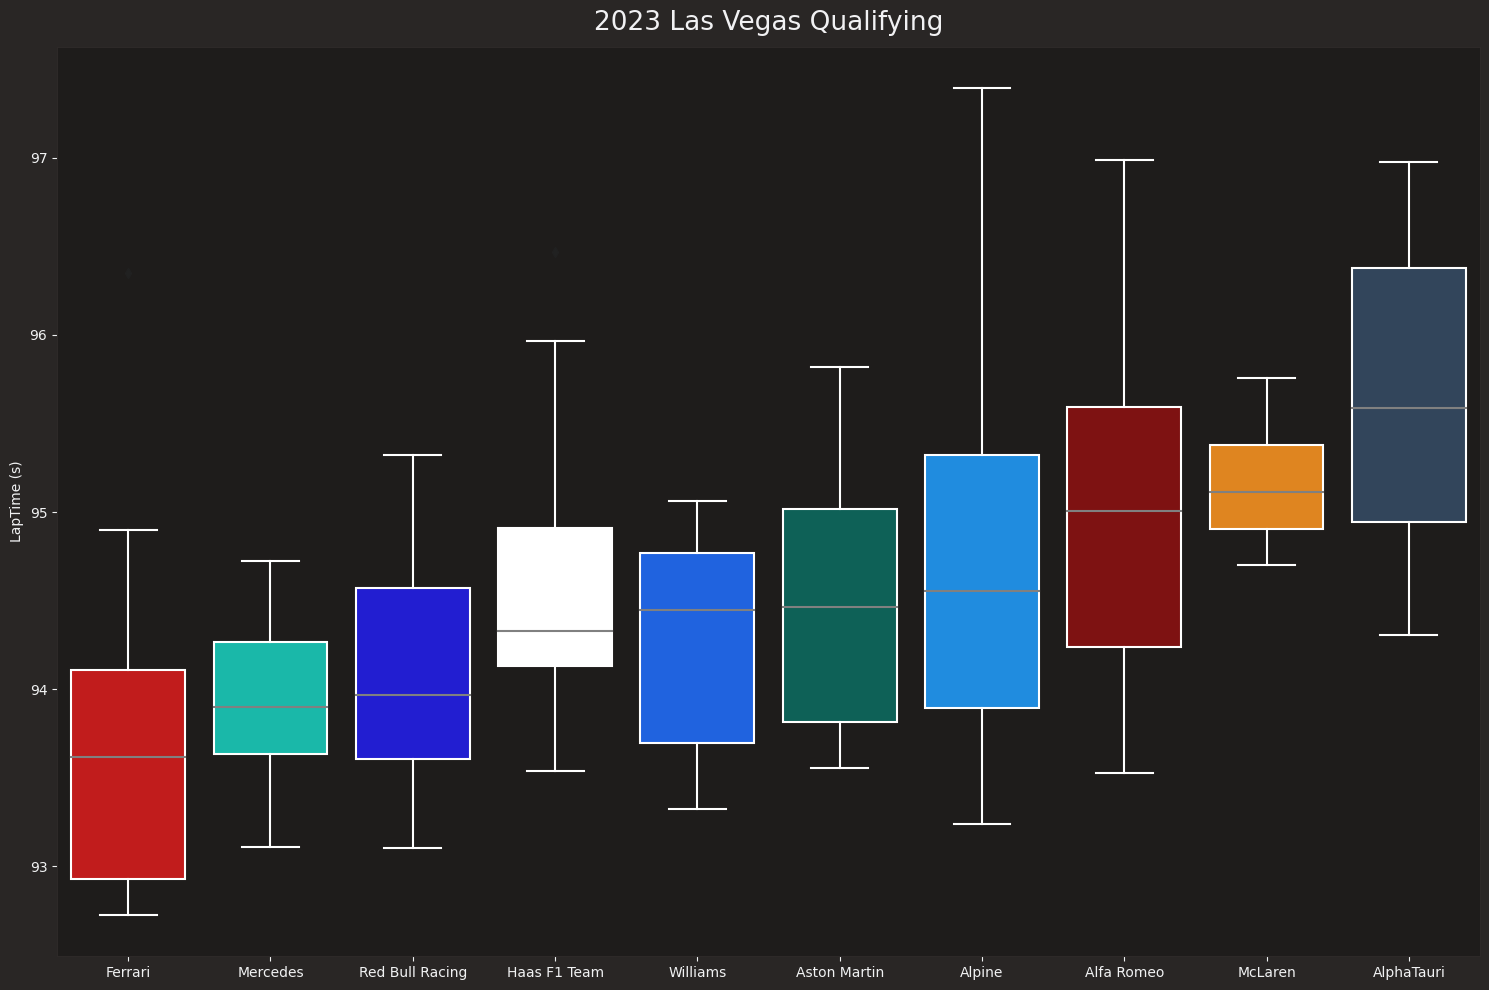

In [ ]:
laps = session.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 Las Vegas Qualifying")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

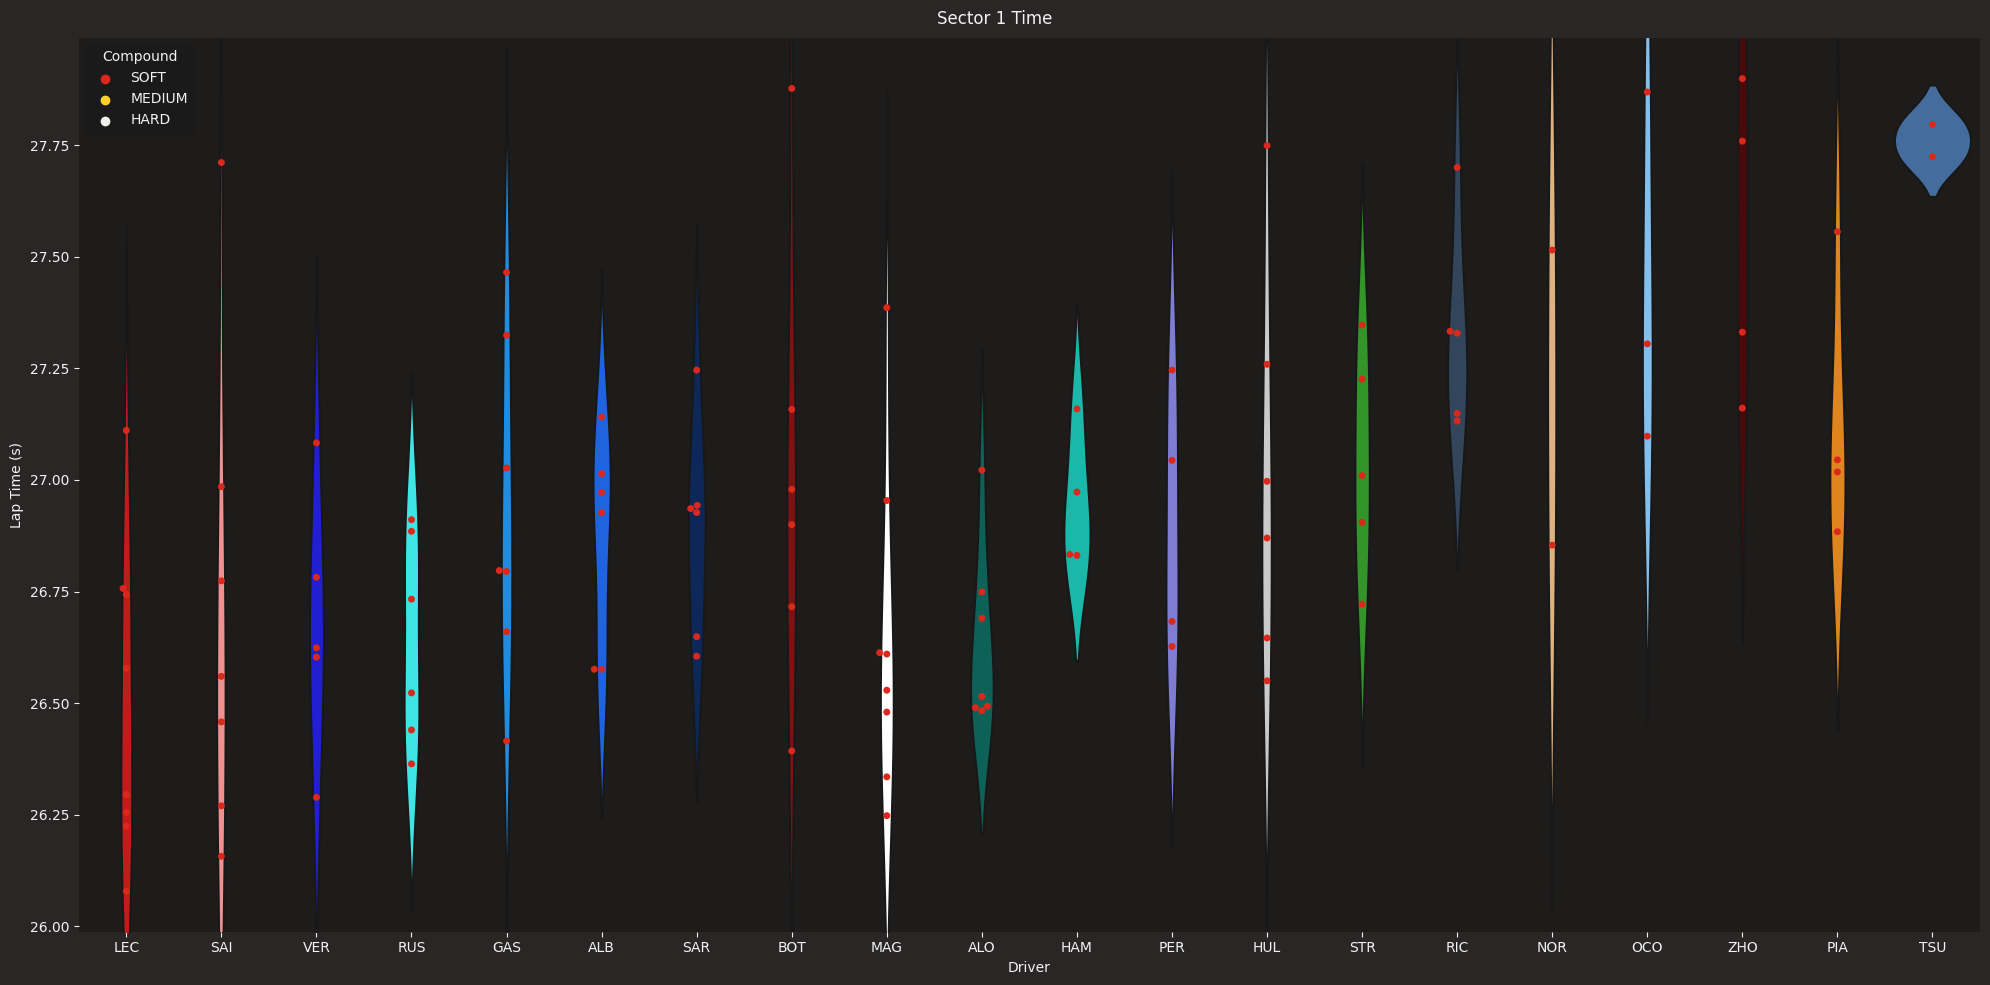

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector1Time"] = driver_laps["Sector1Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector1Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector1Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 1 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


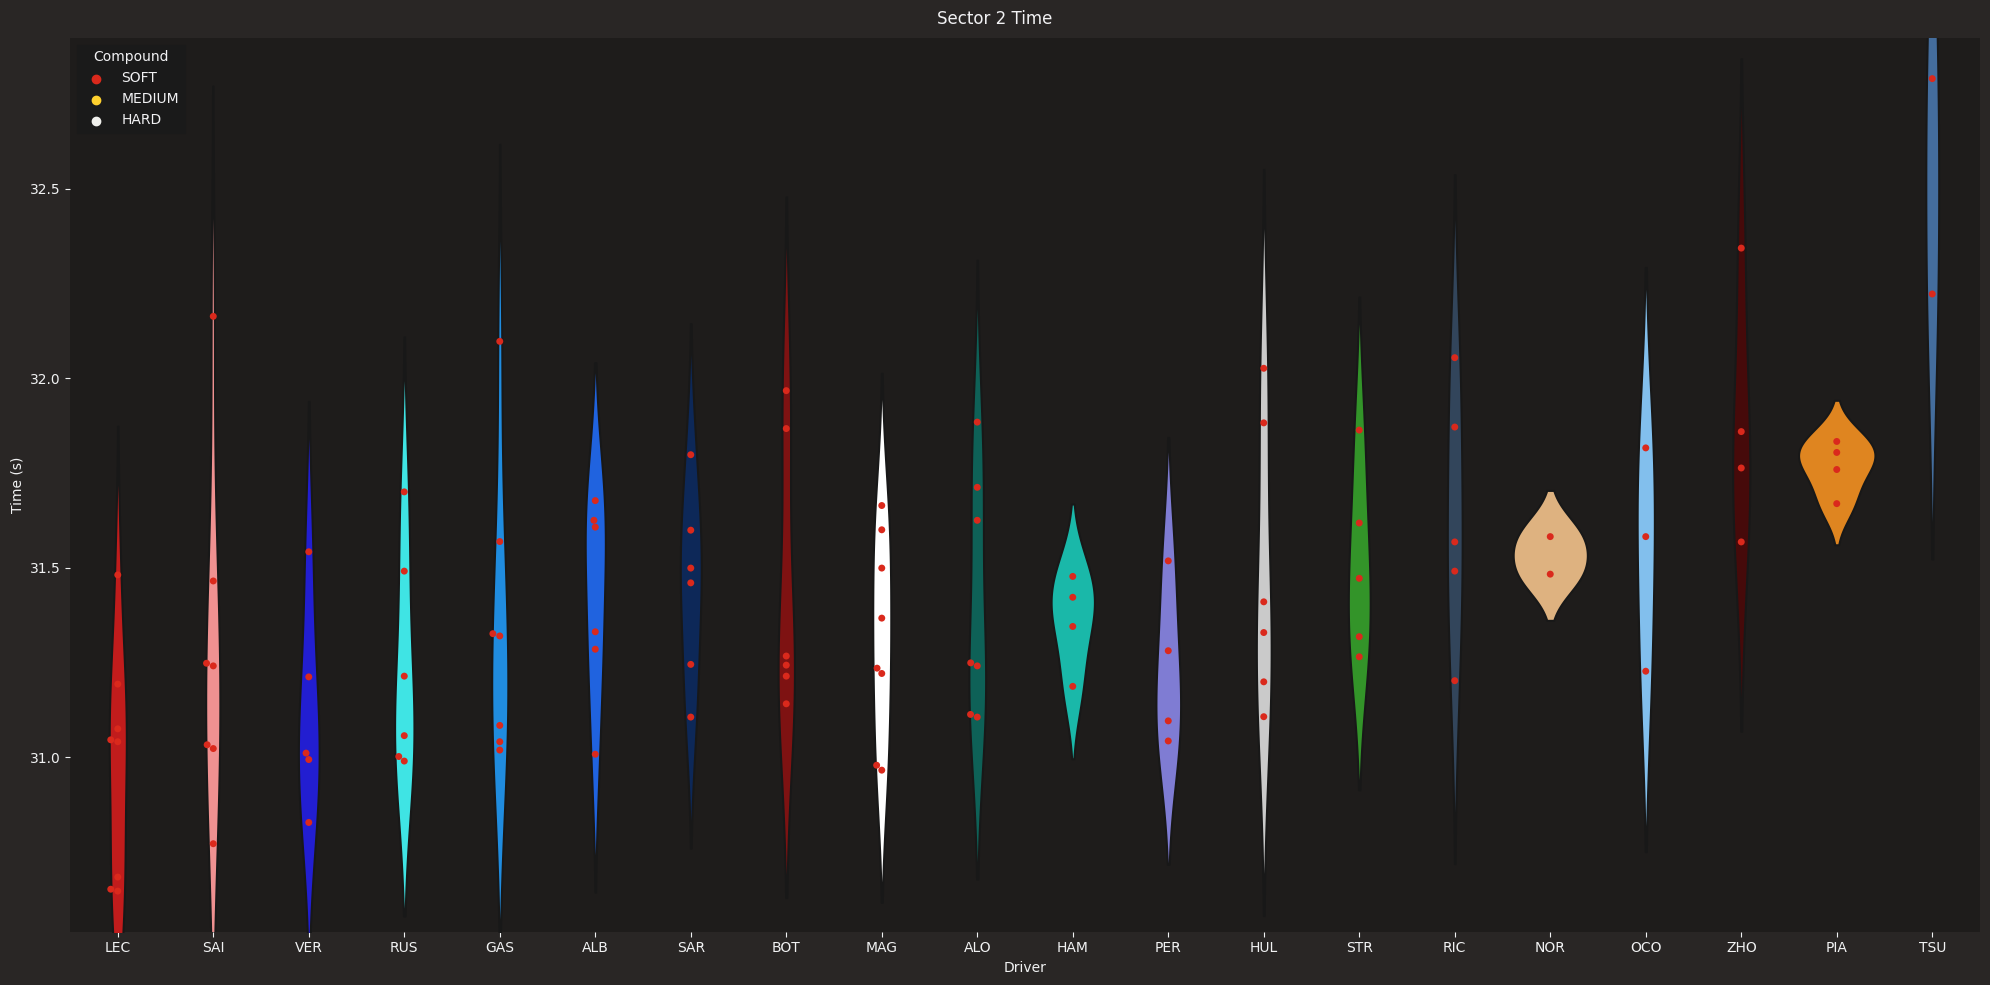

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector2Time"] = driver_laps["Sector2Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector2Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector2Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Time (s)")
plt.suptitle("Sector 2 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()



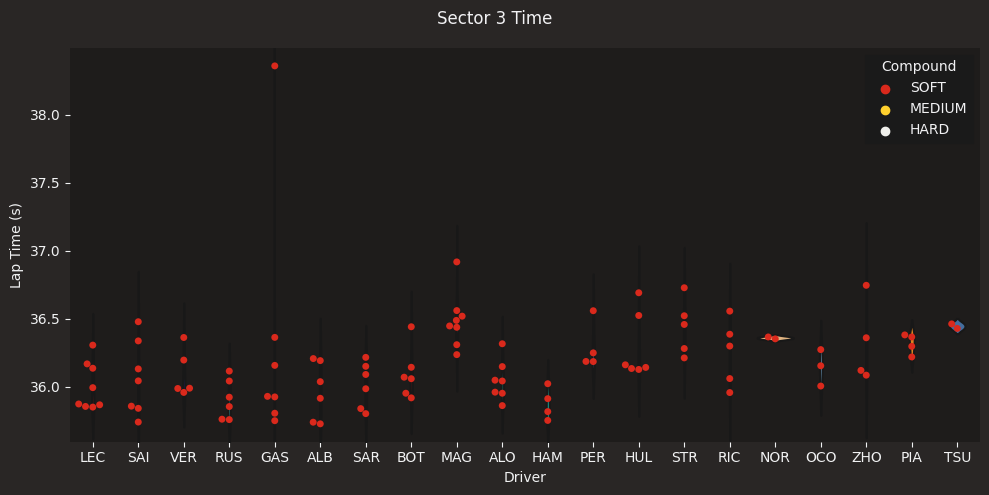

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector3Time"] = driver_laps["Sector3Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector3Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector3Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 3 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


#LAS VEGAS GRAND PRIX 2023

In [ ]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

session = fastf1.get_session(2023, 'Las Vegas','R')
session.load()

core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.1.6]
INFO:fastf1.fastf1.core:Loading data for Las Vegas Grand Prix - Race [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_stat

TypeError: ignored

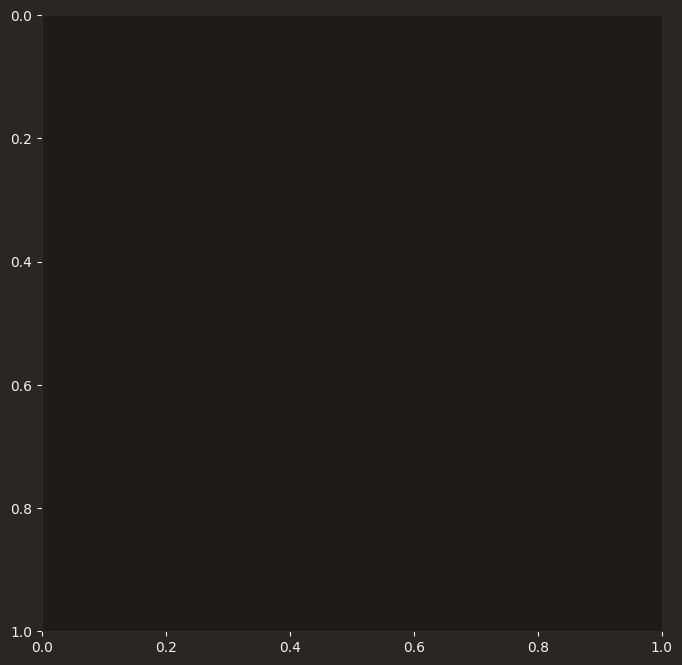

In [ ]:
driver_laps = session.laps.pick_quicklaps().reset_index()

# Convert 'LapTime' to numeric (seconds) for plotting
#driver_laps['LapTime'] = driver_laps['LapTime'].dt.total_seconds()

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
#ax.invert_yaxis()
plt.suptitle("Lap Times vs Compound")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Index(['Red Bull Racing', 'McLaren', 'Ferrari', 'Aston Martin', 'Mercedes',
       'Alpine', 'Williams', 'Haas F1 Team', 'AlphaTauri', 'Alfa Romeo'],
      dtype='object', name='Team')


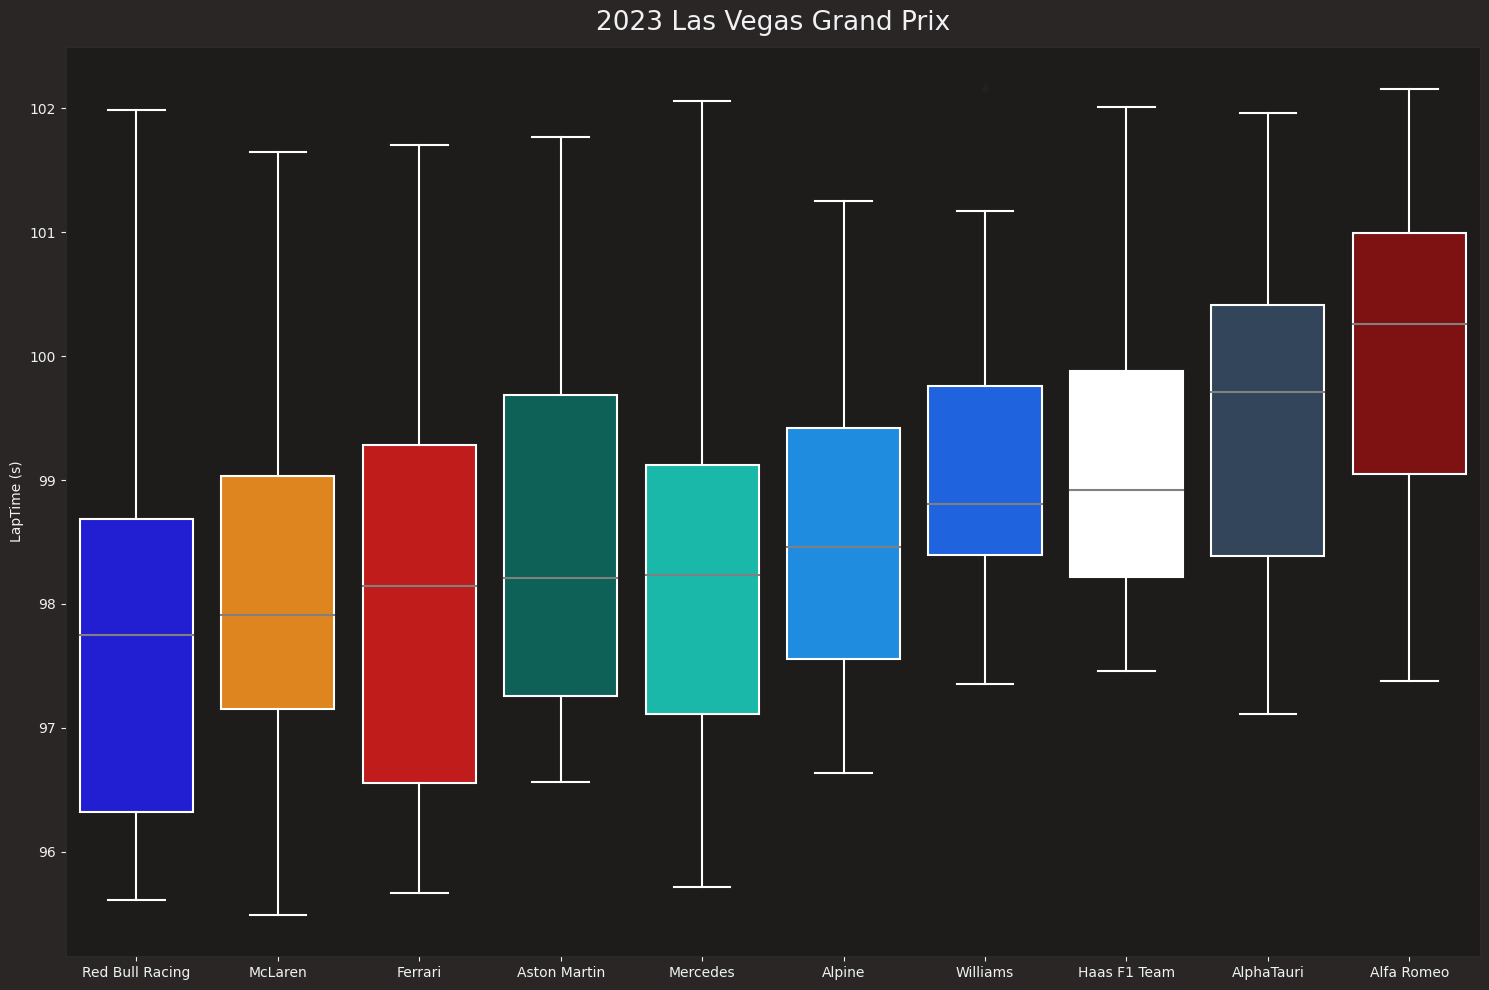

In [ ]:
laps = session.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 Las Vegas Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

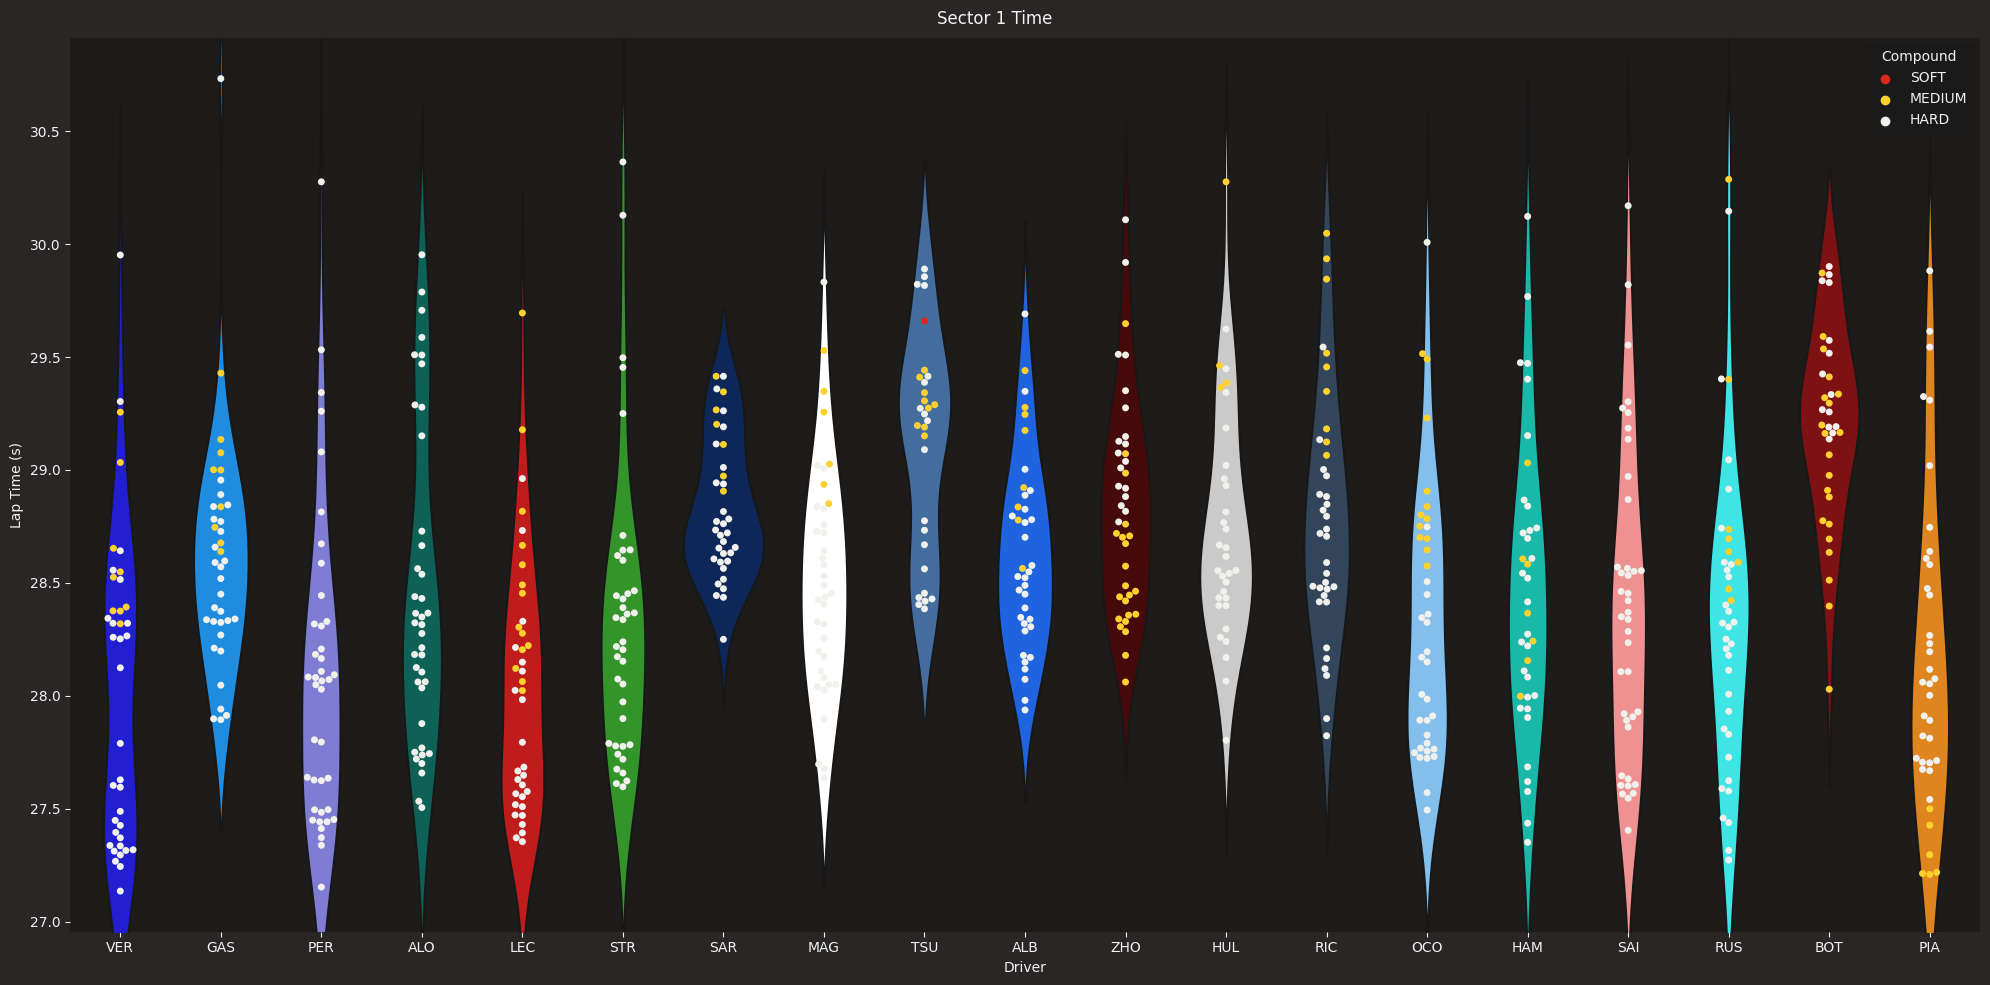

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector1Time"] = driver_laps["Sector1Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector1Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector1Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 1 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


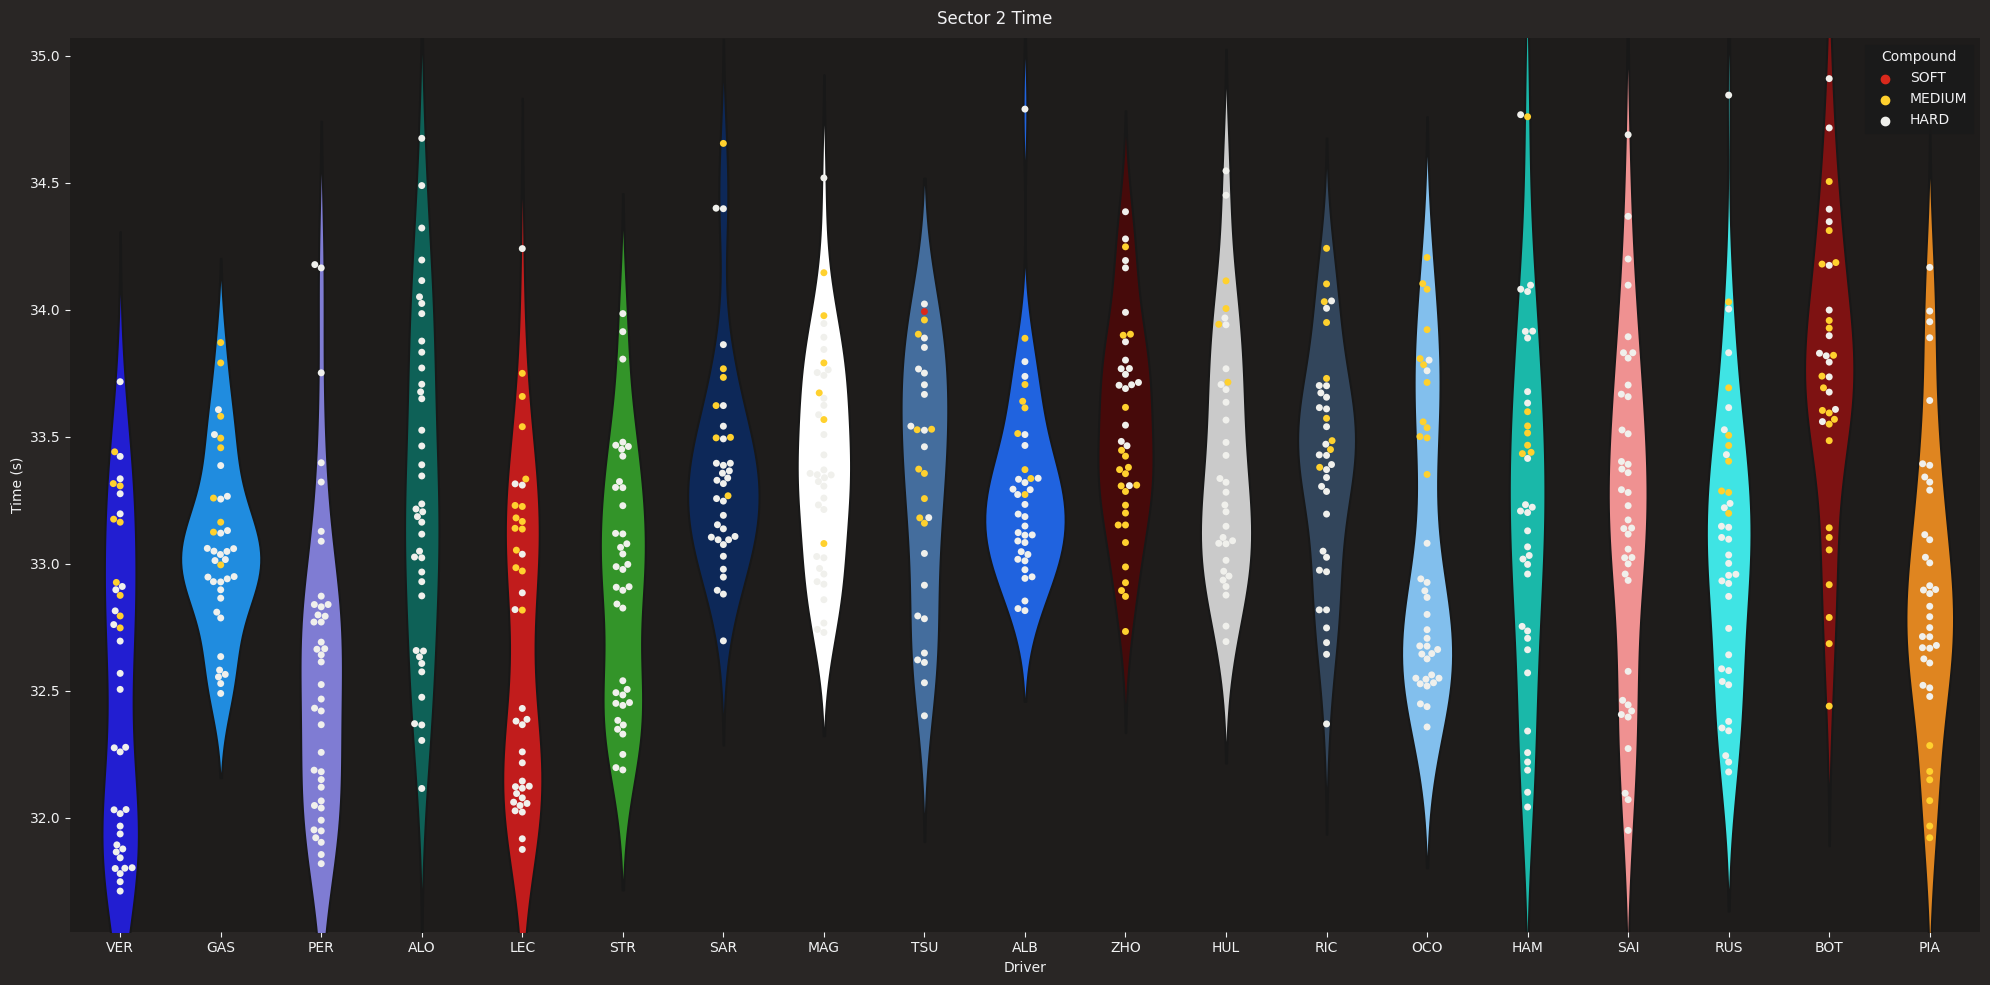

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector2Time"] = driver_laps["Sector2Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector2Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector2Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Time (s)")
plt.suptitle("Sector 2 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.5% of the points cannot be plac

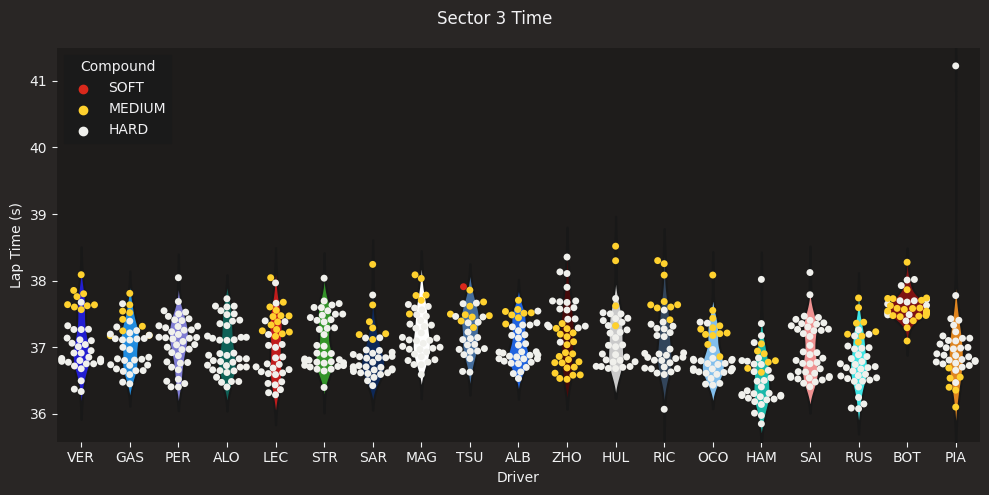

In [ ]:
laps = session.laps.pick_quicklaps()

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["Sector3Time"] = driver_laps["Sector3Time"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="Sector3Time",
               inner=None,
               scale="area",
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="Sector3Time",
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Sector 3 Time")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


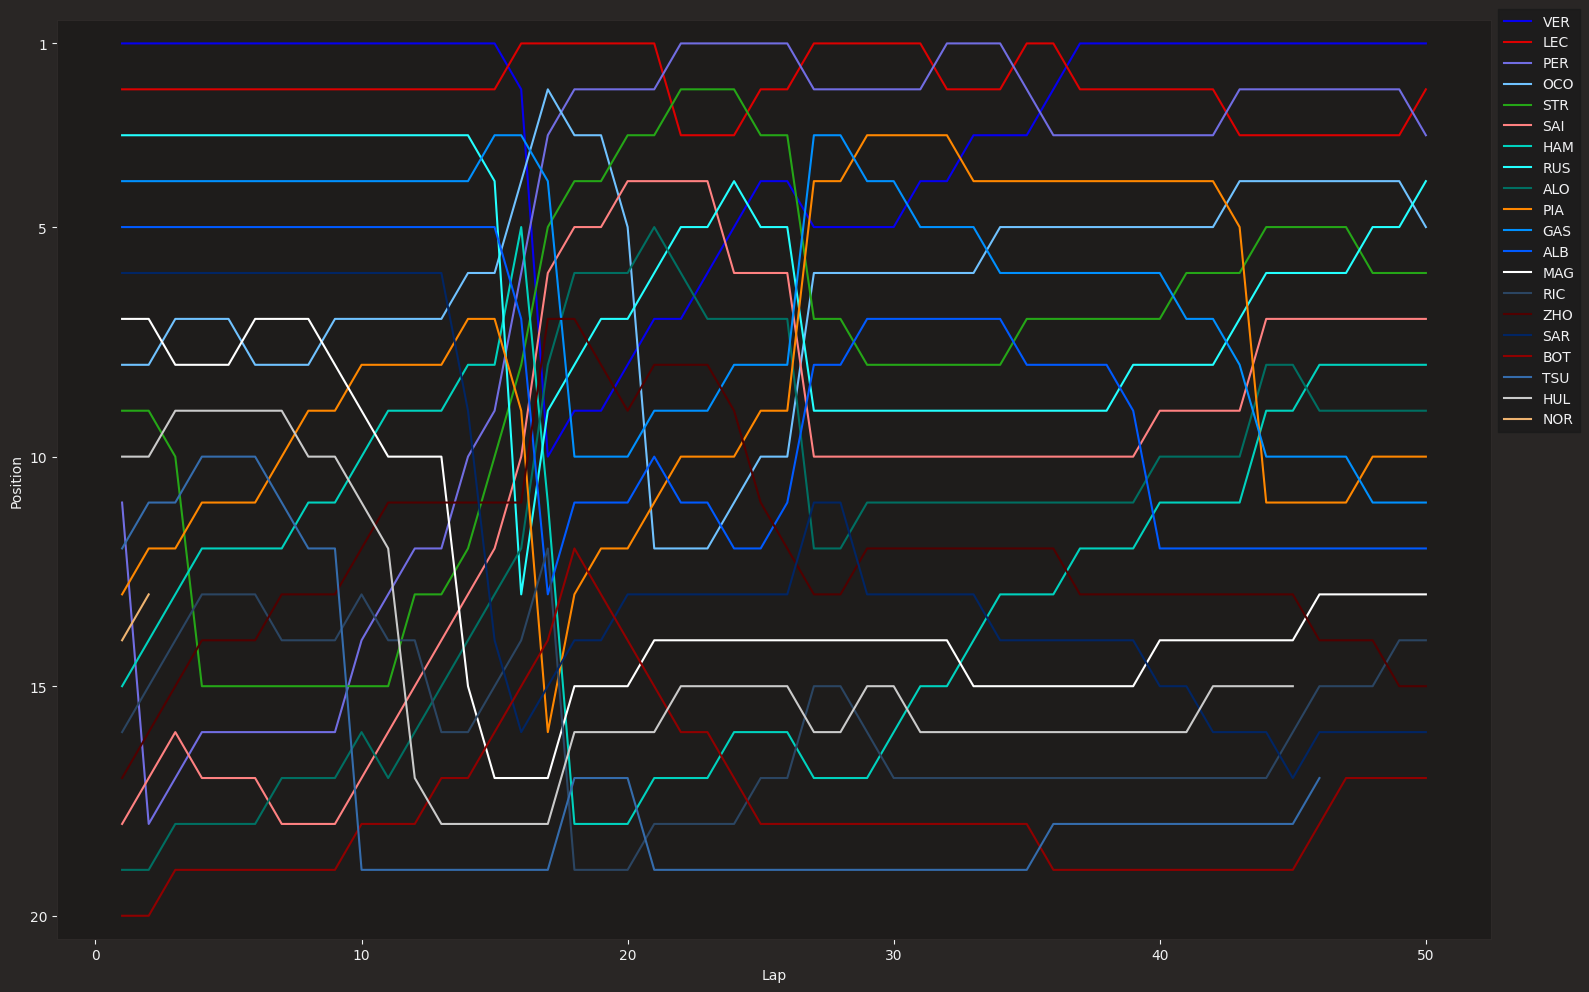

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

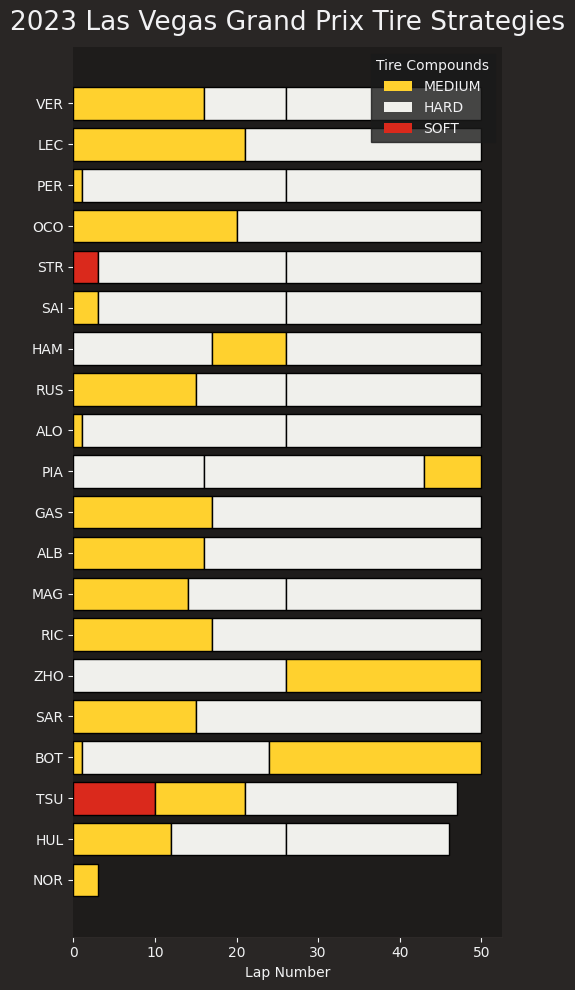

In [ ]:
laps = session.laps

drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2023 Las Vegas Grand Prix Tire Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adding a Legend
legend_labels = {compound: plt.Rectangle((0, 0), 1, 1, fc=fastf1.plotting.COMPOUND_COLORS[compound]) for compound in stints["Compound"].unique()}
ax.legend(legend_labels.values(), legend_labels.keys(), loc='upper right', title='Tire Compounds')


plt.tight_layout()
plt.show()